In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:

df = pd.read_csv('customer_info.csv')
display(df)

,CustomerID,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


In [32]:
# Exclude the columns that do not need to be scaled
exclude_columns = ["CustomerID", "Is_UK"]
scale_columns = df.columns.difference(exclude_columns)

In [33]:
# Drop NaN
# Check for NaN value
print(df.isnull().sum())

CustomerID                  0
Recency                     0
Frequency                   0
Monetary                    0
UniqueItemsPurchased        0
AvgDaysBetweenPurchases    77
FavoriteShoppingHour        0
Is_UK                       0
Cancellation_Frequency      0
Cancellation_Rate           0
Total_Spend                 0
Monthly_Spending_Mean       0
Monthly_Spending_Std        0
Spending_Trend              0
FavoriteShoppingDay         0
dtype: int64


In [34]:
# Interpolate Missing Value
df.interpolate(method="linear", inplace=True)

In [35]:
# Re-check NaN
print(df.isnull().sum().sum())

0


In [36]:
# make a copy of original dataset
scaled_df = df.copy()
display(scaled_df)

,CustomerID,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Standardize dataset
scaled_df[scale_columns] = scaler.fit_transform(scaled_df[scale_columns])
scaled_df.head()

,CustomerID,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,2.316176,-0.329690,-0.229846,-0.705098,-0.271485,-1.076916,1,0.114243,2.215616,-0.229846,-0.450541,-0.282559,0.053881,-0.852531
1,12347,-0.893205,0.220845,0.291613,0.489897,-0.094512,0.654246,0,-0.394774,-0.602781,0.291613,0.162554,0.231019,0.063530,-0.852531
2,12348,-0.170103,-0.109476,-0.055957,-0.470785,0.613383,2.818198,0,-0.394774,-0.602781,-0.055957,-0.092760,0.024433,-0.163112,0.229757
3,12349,-0.724811,-0.439797,-0.053500,0.126713,-0.271485,-1.509706,0,-0.394774,-0.602781,-0.053500,1.000808,-0.282559,0.053881,-1.393674
4,12350,2.157688,-0.439797,-0.194227,-0.529363,-0.271485,1.519827,0,-0.394774,-0.602781,-0.194227,-0.157394,-0.282559,0.053881,-0.311387


PCA

In [38]:
from sklearn.decomposition import PCA

In [39]:
scaled_df.set_index("CustomerID", inplace=True)

In [40]:
pca = PCA().fit(scaled_df[scale_columns])

In [41]:
# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

for i in range(len(explained_variance_ratio)):
    
    print(f"The Explained vaiance ratio for Cluster {i+1} is: {explained_variance_ratio[i]}")
    print(f"The Cumulated vaiance is: {cumulative_explained_variance[i]}")

The Explained vaiance ratio for Cluster 1 is: 0.33490423841734346
The Cumulated vaiance is: 0.33490423841734346
The Explained vaiance ratio for Cluster 2 is: 0.1322982555999796
The Cumulated vaiance is: 0.46720249401732306
The Explained vaiance ratio for Cluster 3 is: 0.09553520451775313
The Cumulated vaiance is: 0.5627376985350762
The Explained vaiance ratio for Cluster 4 is: 0.08573338682038315
The Cumulated vaiance is: 0.6484710853554593
The Explained vaiance ratio for Cluster 5 is: 0.07950301852936936
The Cumulated vaiance is: 0.7279741038848286
The Explained vaiance ratio for Cluster 6 is: 0.07203766743207557
The Cumulated vaiance is: 0.8000117713169042
The Explained vaiance ratio for Cluster 7 is: 0.07017565000831441
The Cumulated vaiance is: 0.8701874213252185
The Explained vaiance ratio for Cluster 8 is: 0.05459789432610308
The Cumulated vaiance is: 0.9247853156513216
The Explained vaiance ratio for Cluster 9 is: 0.030426703372637278
The Cumulated vaiance is: 0.9552120190239589

In [42]:
# Prepare data for export
pca_results = pd.DataFrame({
    "Principal Component": range(1, len(explained_variance_ratio) + 1),
    "Explained Variance Ratio": explained_variance_ratio,
    "Cumulative Explained Variance": cumulative_explained_variance
})

# Export to CSV
pca_results.to_csv("pca_results.csv", index=False)
print("PCA results exported to 'pca_results.csv'.")


PCA results exported to 'pca_results.csv'.


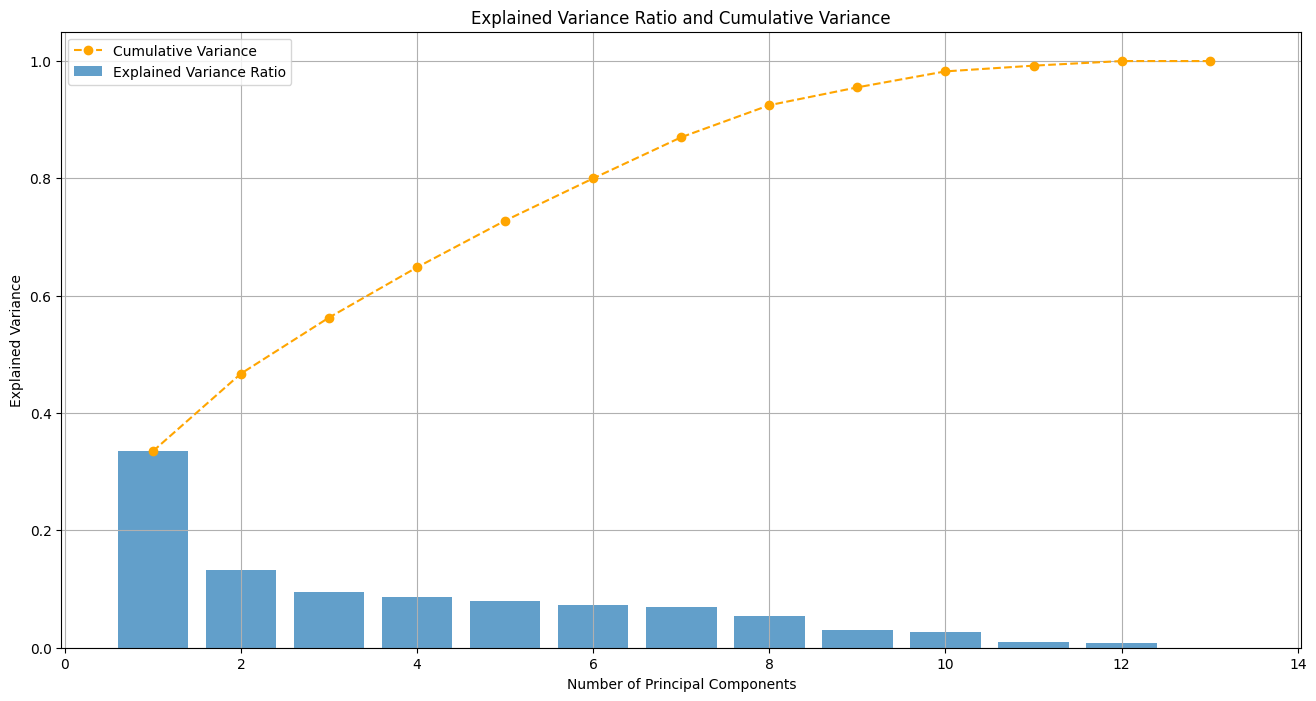

In [43]:
# Plot cumulative explained variance
plt.figure(figsize=(16, 8))

# Bar plot for explained variance ratio
plt.bar(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    alpha=0.7,
    label="Explained Variance Ratio"
)

# Line plot for cumulative explained variance
plt.plot(
    
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
    linestyle="--",
    color="orange",
    label="Cumulative Variance"
)

plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance Ratio and Cumulative Variance")
plt.legend()
plt.grid()
plt.show()

In [44]:
pca = PCA(n_components=6)
df_pca = pca.fit_transform(scaled_df[scale_columns])
df_pca = pd.DataFrame(df_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
df_pca.index = scaled_df.index

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346,-0.844121,0.203243,-2.287150,-0.148266,-2.190113,1.372749
12347,0.584115,-0.189852,0.673809,-0.133536,0.210225,-1.368551
12348,-0.477397,-0.448554,0.777411,1.296499,1.225400,-0.541863
12349,0.056191,-0.616356,-0.042374,-1.449714,-0.657627,-1.250578
12350,-1.131146,-0.973562,0.183859,1.210659,-1.056314,0.294478


GMM: soft assignments, it is better used for overlapping data

In [45]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score

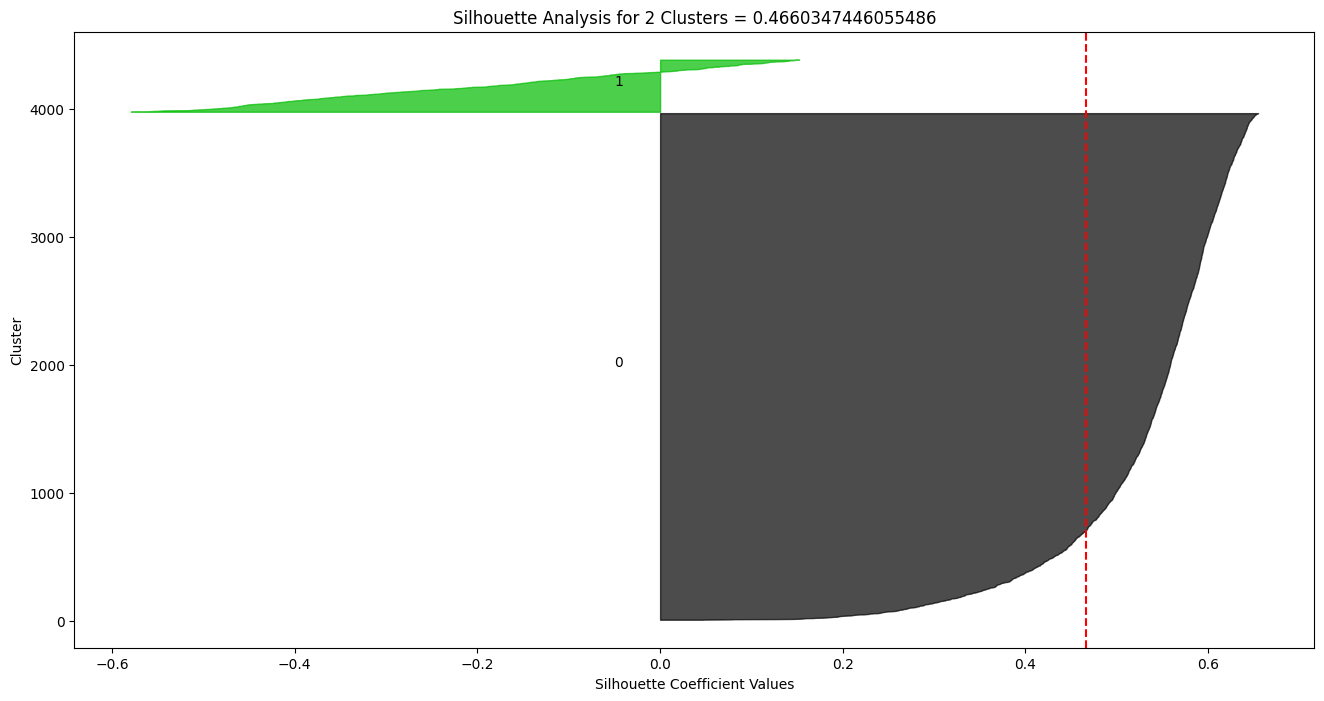

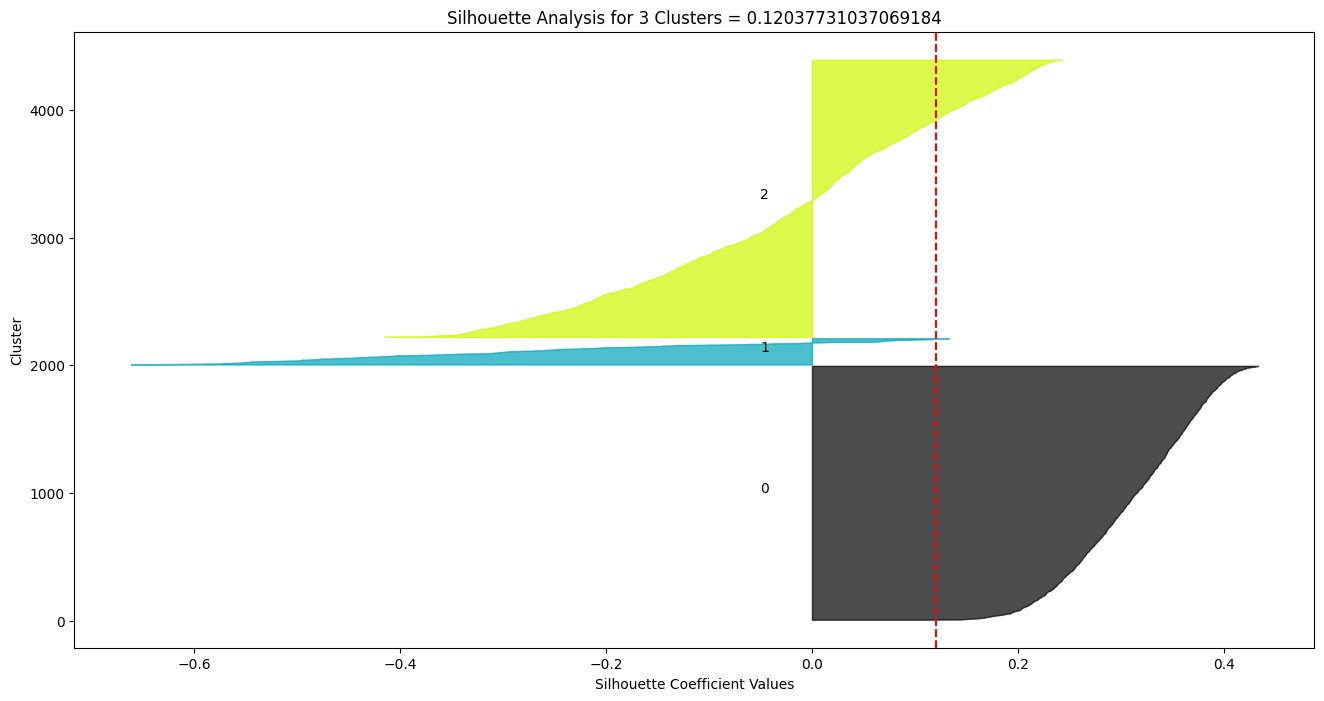

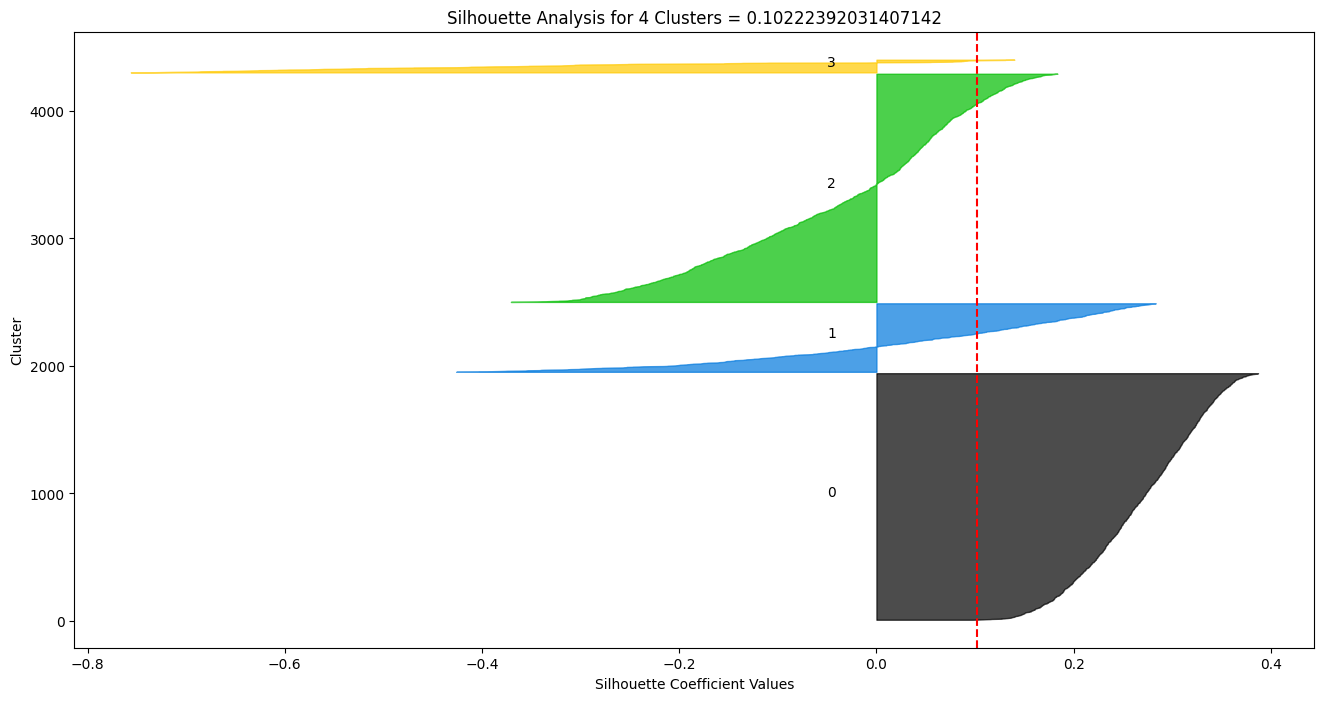

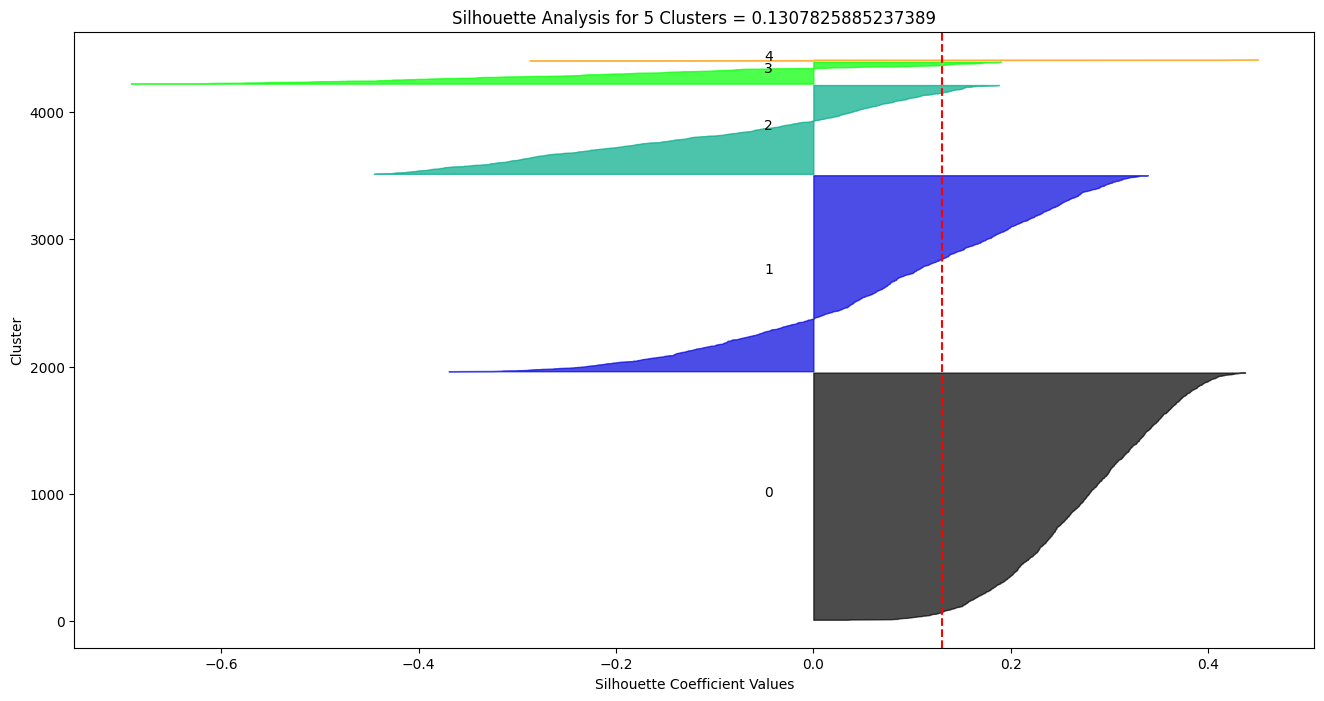

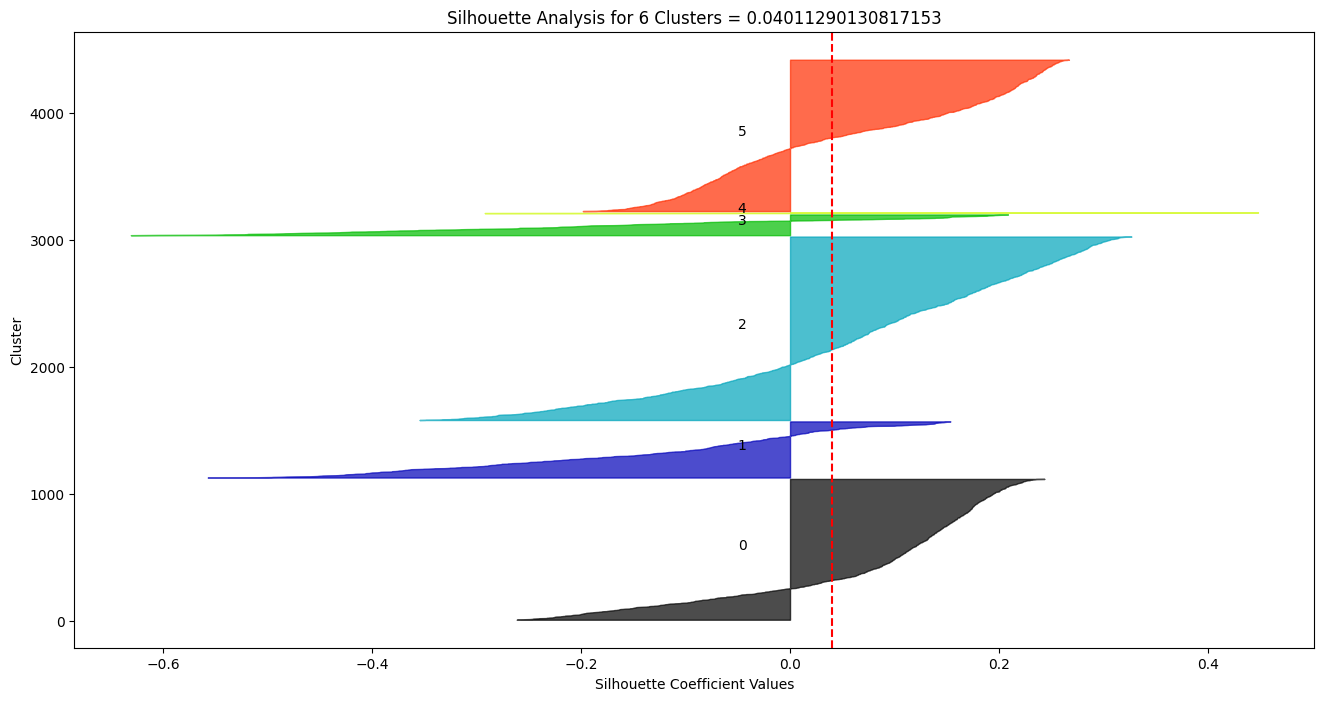

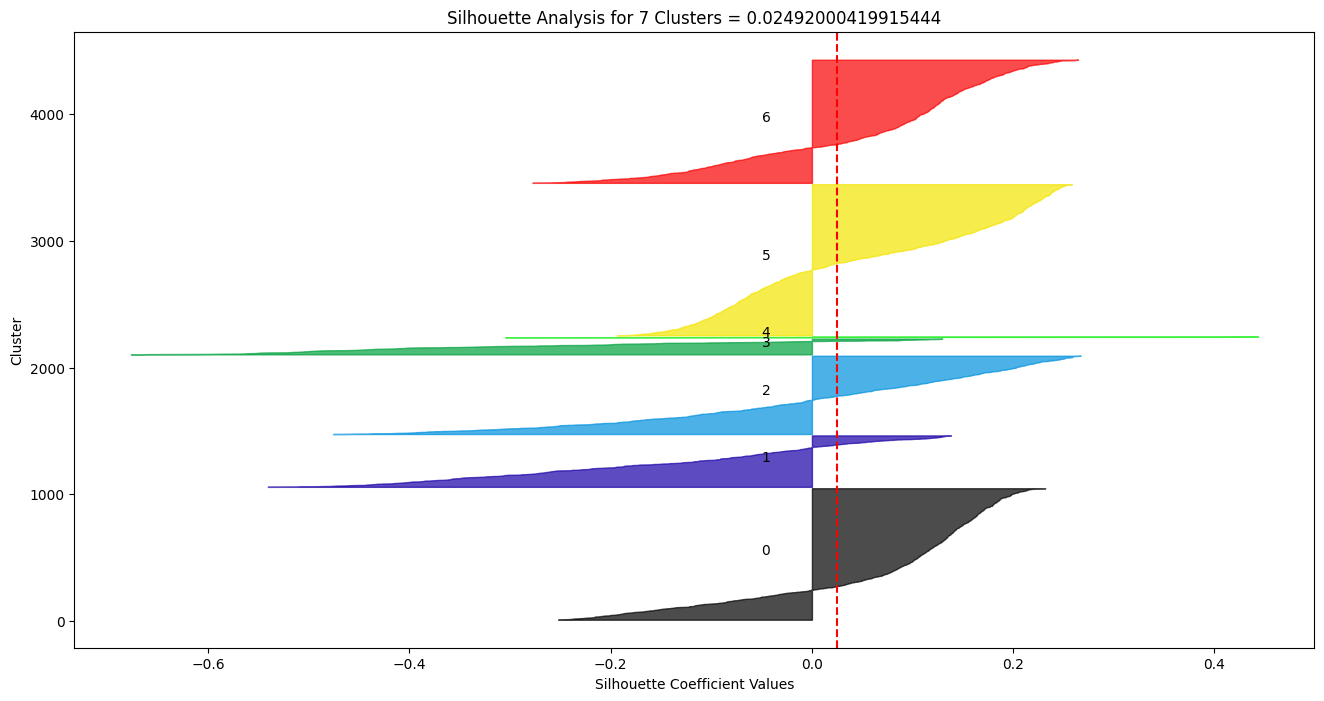

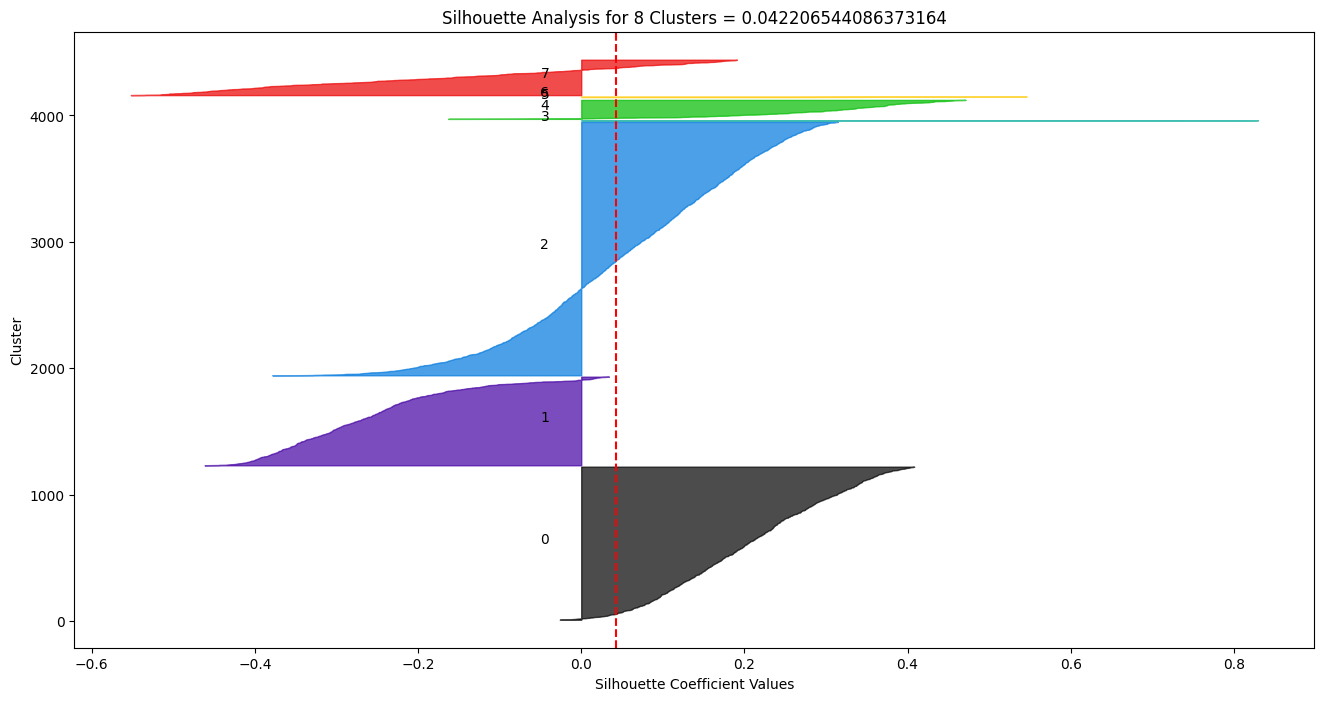

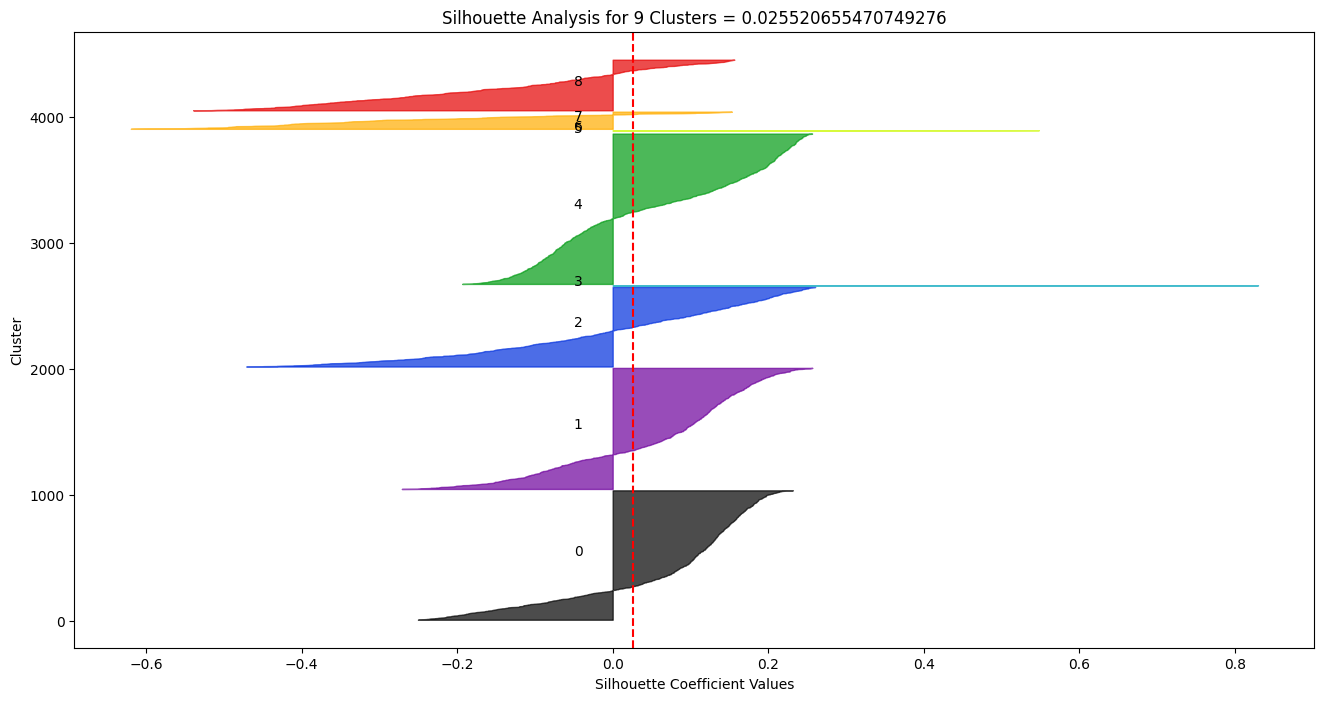

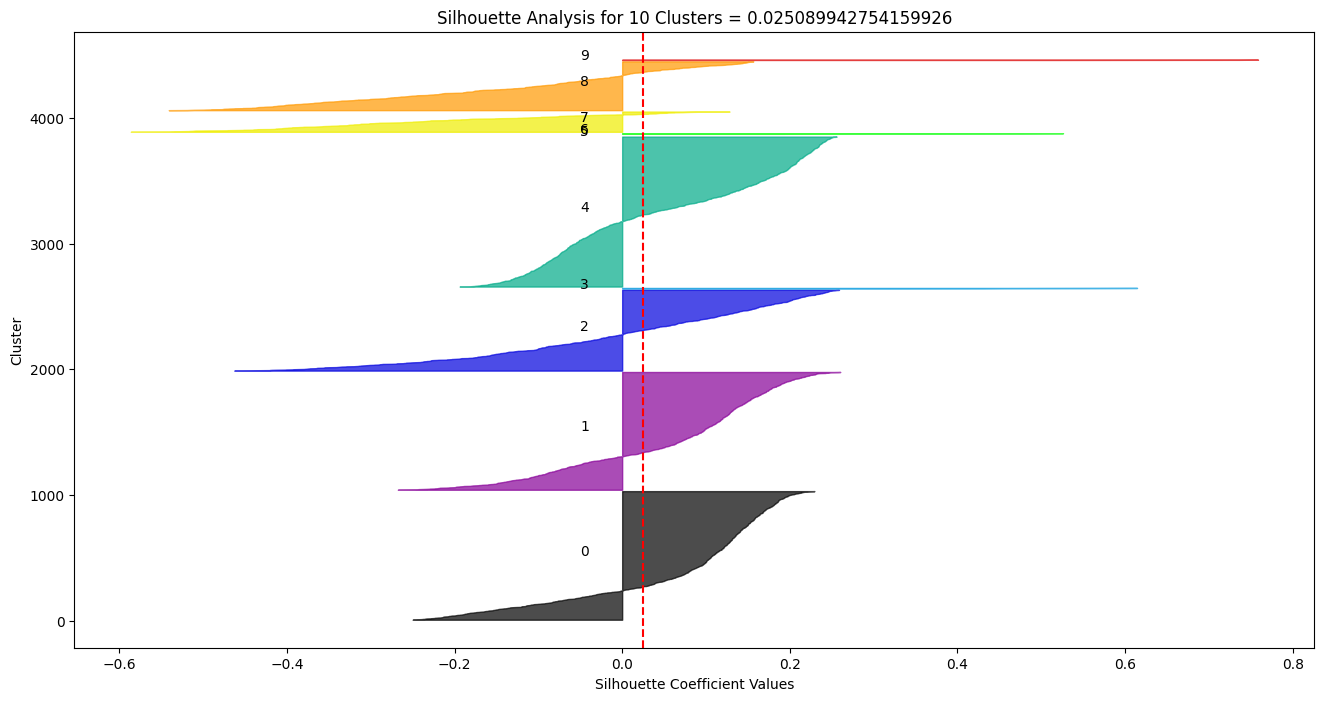


Evaluation Metrics for Clusters:


,Number of Clusters,Silhouette Score,Log-likelihood,CH indices,Bic (find low),Davies Bouldin (find low)
0,2,0.466035,-31092.773036,558.716972,62646.483800,1.696782
1,3,0.120377,-24074.196389,502.943419,48843.989712,2.064333
2,4,0.102224,-23502.841882,441.687882,47935.939903,2.286312
3,5,0.130783,-22686.394756,671.201263,46537.704859,1.850787
4,6,0.040113,-16753.723335,593.943678,34907.021223,2.206439
5,7,0.024920,-15977.034550,492.174206,33588.302860,2.436153
6,8,0.042207,-18071.033679,601.522752,38010.960325,1.720026
7,9,0.025521,-15772.022292,616.040972,33647.596757,1.921978
8,10,0.025090,-15634.608830,623.766903,33607.429040,1.876895


In [46]:
# Range of clusters to evaluate
range_clusters = range(2, 11)

# Initialize lists to store evaluation metrics
aic = []
bic = []
silhouette_scores = []
log_likelihood_values = []
CH_index = []
DB_values = []


silhouette_metrics = {
    "Number of Clusters": [],
    "Silhouette Score": [],
    "Log-likelihood":[],
    "CH indices":[],
    "Bic (find low)":[],
    "Davies Bouldin (find low)":[]
}

# Loop through each cluster count
for n_clusters in range_clusters:
    # Fit GMM
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    cluster_gmm = gmm.fit(df_pca)

    # 1. Calculate log-likelihood
    log_likelihood = cluster_gmm.score(df_pca) * len(df_pca)
    log_likelihood_values.append(log_likelihood)

    # 2. Calculate AIC/BIC
    aic.append(cluster_gmm.aic(df_pca))
    bic.append(cluster_gmm.bic(df_pca))

    # Assign clusters
    cluster_labels = cluster_gmm.predict(df_pca)
    #df_pca['Cluster'] = cluster_labels
    
    # 3. Calculate silhouette scores
    overall_silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(overall_silhouette_avg)
    
    # 4. Calculate CH index
    calinski_harabasz = calinski_harabasz_score(df_pca, cluster_labels)
    CH_index.append(calinski_harabasz)

    # 5. Calculate DB 
    davies_bouldin = davies_bouldin_score(df_pca, cluster_labels)
    DB_values.append(davies_bouldin)

    silhouette_metrics["Number of Clusters"].append(n_clusters)
    silhouette_metrics["Silhouette Score"].append(overall_silhouette_avg)
    silhouette_metrics["Log-likelihood"].append(log_likelihood)
    silhouette_metrics["CH indices"].append(calinski_harabasz)
    silhouette_metrics["Bic (find low)"].append(cluster_gmm.bic(df_pca))
    silhouette_metrics["Davies Bouldin (find low)"].append(davies_bouldin)


    # Visualize silhouette plot
    silhouette_per_sample = silhouette_samples(df_pca, cluster_labels)

    plt.figure(figsize=(16, 8))
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate silhouette scores for the current cluster
        cluster_values = silhouette_per_sample[np.array(cluster_labels) == i]
        cluster_values.sort()

        size_cluster = cluster_values.shape[0]
        y_upper = y_lower + size_cluster
        color = plt.cm.nipy_spectral(float(i) / n_clusters)

        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=overall_silhouette_avg, color="red", linestyle="--")
    plt.title(f"Silhouette Analysis for {n_clusters} Clusters = {overall_silhouette_avg}")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster")
    plt.show()


metrics_df = pd.DataFrame(silhouette_metrics)
metrics_df.to_csv("silhouette_metrics.csv", index=False)
print("\nEvaluation Metrics for Clusters:")
display(metrics_df)

In [59]:
# Plot the trend for aic/bic (find low)
'''
plt.figure(figsize=(16,8))
plt.plot(range_clusters, aic, marker='o', label="AIC")
plt.plot(range_clusters, bic, marker='s', label="BIC")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()'''

'\nplt.figure(figsize=(16,8))\nplt.plot(range_clusters, aic, marker=\'o\', label="AIC")\nplt.plot(range_clusters, bic, marker=\'s\', label="BIC")\nplt.xlabel("Number of Clusters")\nplt.ylabel("Score")\nplt.legend()\nplt.grid()\nplt.show()'

In [60]:
# Plot the trend for Log-likelihood

'''plt.figure(figsize=(16,8))
plt.plot(range_clusters, log_likelihood_values, marker='o', label="Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()'''

'plt.figure(figsize=(16,8))\nplt.plot(range_clusters, log_likelihood_values, marker=\'o\', label="Log-Likelihood")\nplt.xlabel("Number of Clusters")\nplt.ylabel("Score")\nplt.legend()\nplt.grid()\nplt.show()'

In [61]:
# Plot the trend for CH Index

'''plt.figure(figsize=(16, 8))
plt.plot(range_clusters, CH_index, marker='o', label="CH Index")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()
'''

'plt.figure(figsize=(16, 8))\nplt.plot(range_clusters, CH_index, marker=\'o\', label="CH Index")\nplt.xlabel("Number of Clusters")\nplt.ylabel("Score")\nplt.legend()\nplt.grid()\nplt.show()\n'

In [62]:
# Plot the trend for Silhouette Score

'''plt.figure(figsize=(16, 8))
plt.plot(range_clusters, silhouette_scores, marker='o', label="Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()'''


'plt.figure(figsize=(16, 8))\nplt.plot(range_clusters, silhouette_scores, marker=\'o\', label="Silhouette Score")\nplt.xlabel("Number of Clusters")\nplt.ylabel("Score")\nplt.legend()\nplt.grid()\nplt.show()'

In [63]:
# Plot the trend for DB Values (find low)

'''plt.figure(figsize=(16, 8))
plt.plot(range_clusters, DB_values, marker='o', label="DB Values")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()
'''

'plt.figure(figsize=(16, 8))\nplt.plot(range_clusters, DB_values, marker=\'o\', label="DB Values")\nplt.xlabel("Number of Clusters")\nplt.ylabel("Score")\nplt.legend()\nplt.grid()\nplt.show()\n'


Processing for 2 clusters...

Processing for 3 clusters...

Processing for 4 clusters...

Processing for 5 clusters...

Processing for 6 clusters...

Processing for 7 clusters...


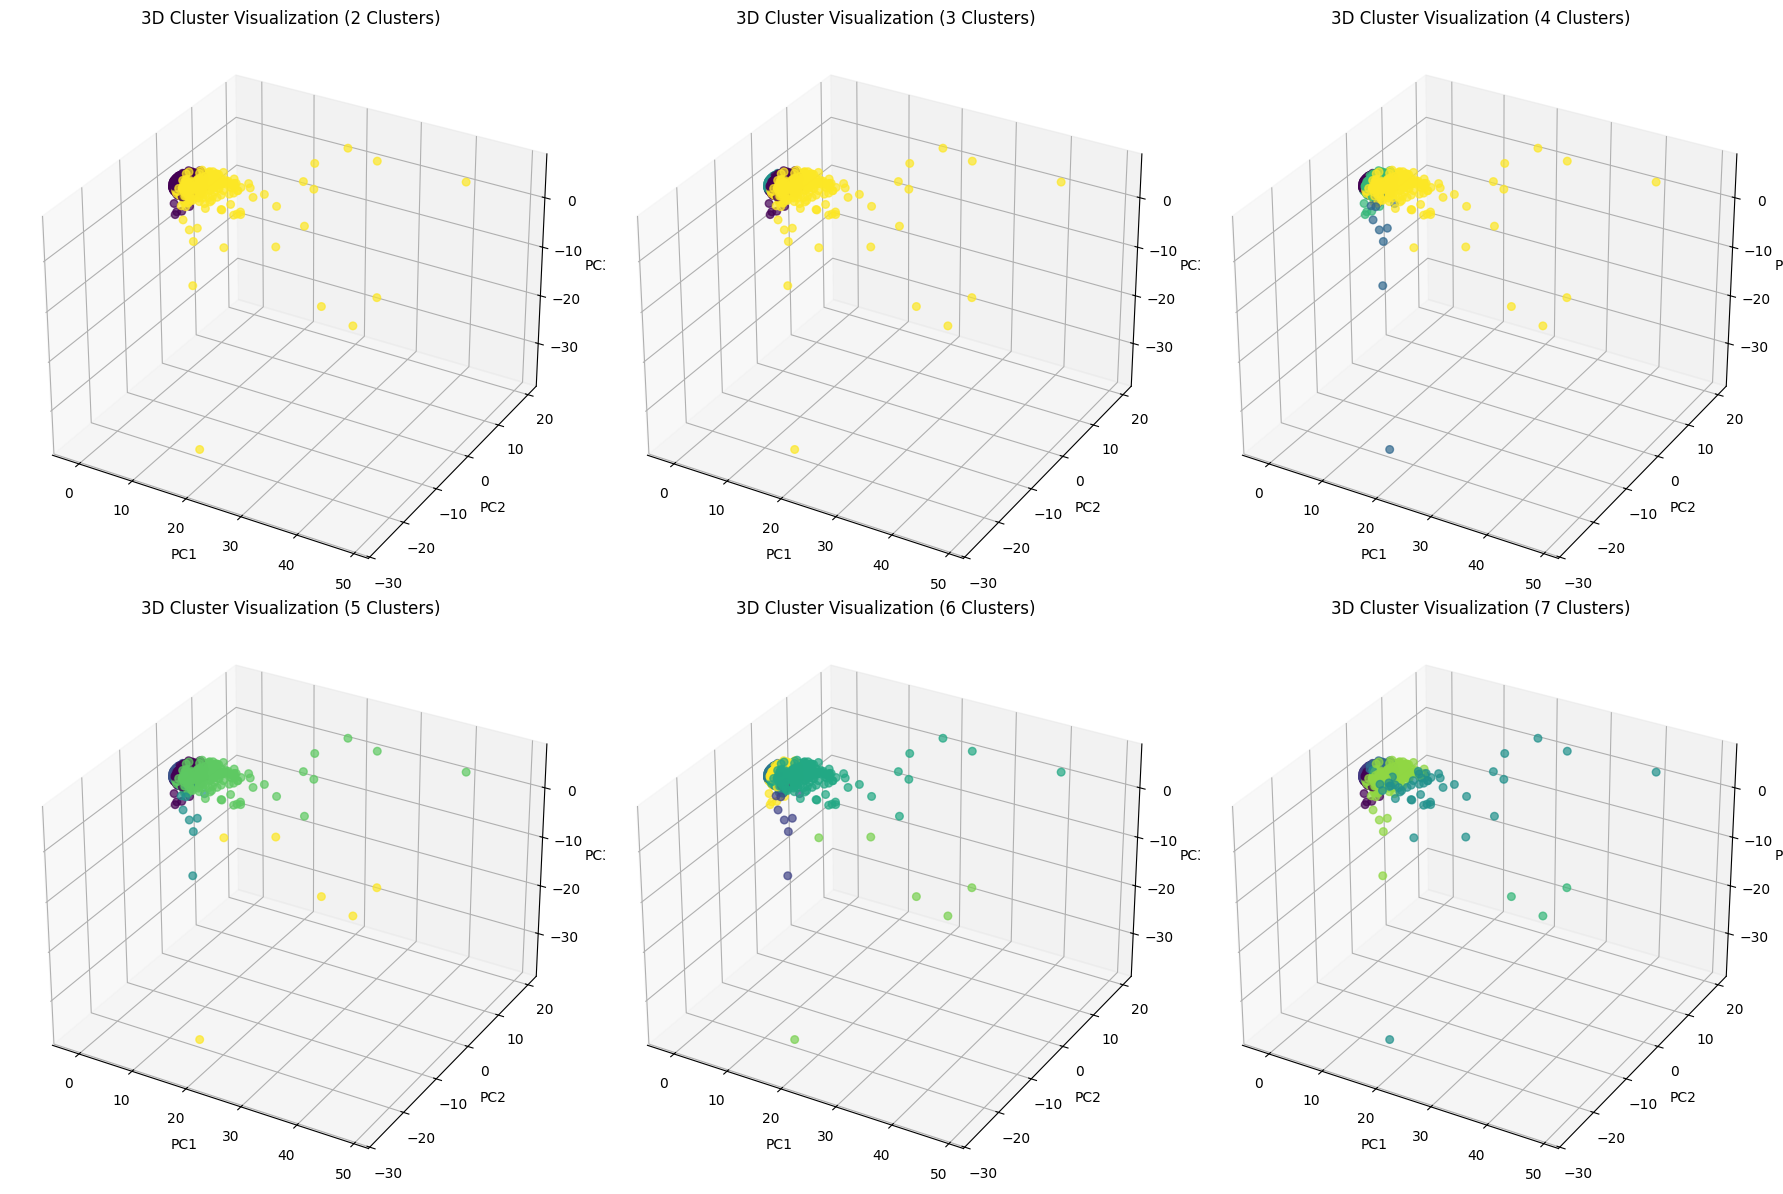

In [52]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming the PCA-transformed data (df_pca) and the original dataset (df) are ready

# Define range for optimal clusters (2 to 7)
optimal_clusters_range = range(2, 8)

# Create a figure with subplots for each cluster count
fig = plt.figure(figsize=(18, 12))

# Calculate the number of rows for subplots based on the range
rows = int(np.ceil(len(optimal_clusters_range) / 2))

for idx, optimal_clusters in enumerate(optimal_clusters_range):
    print(f"\nProcessing for {optimal_clusters} clusters...")
    
    # Step 1: Fit GMM for the given number of clusters
    gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
    df_pca['Cluster'] = gmm.fit_predict(df_pca)
    
    # Add subplot for this cluster count
    ax = fig.add_subplot(2, 3, idx + 1, projection='3d')
    
    # Step 2: Visualize clusters in 3D using the first 3 PCA components
    scatter = ax.scatter(
        df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], 
        c=df_pca['Cluster'], cmap='viridis', s=30, alpha=0.7
    )
    
    # Set titles and labels for the subplot
    ax.set_title(f'3D Cluster Visualization ({optimal_clusters} Clusters)')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



Processing for 2 clusters...
Cluster Sizes and Feature Averages for 2 Clusters:


,Cluster,Size,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,0,3912,95.496677,3.668200,968.290470,50.736708,3.231979,12.509714,0.910020,0.495654,0.091731,968.290470,337.610312,101.062854,-0.237349,2.563906
1,1,450,53.582222,16.522222,9997.135556,152.008889,1.643333,12.302222,0.848889,3.208889,0.239123,9997.135556,1450.946693,940.375995,-240.756280,2.675556



Detailed DataFrame for 2 Clusters:


,CustomerID,Cluster,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,0,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,0,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,0,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,0,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,0,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,0,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,0,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,0,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,0,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


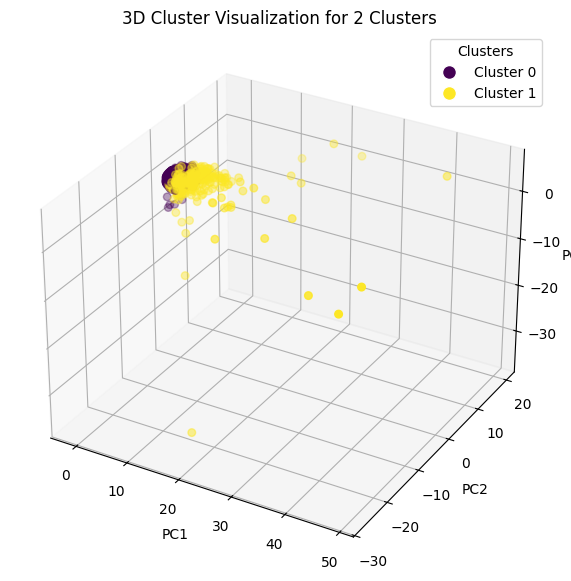


Processing for 3 clusters...
Cluster Sizes and Feature Averages for 3 Clusters:


,Cluster,Size,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,0,64,160.265625,2.203125,412.983906,3.609375,57.250000,11.937500,0.953125,0.625000,0.450260,412.983906,112.531211,76.965012,-6.098375,2.500000
1,1,3870,95.872868,3.677261,971.130367,51.248062,2.328553,12.524548,0.909302,0.496382,0.090966,971.130367,338.574344,100.886853,-0.139073,2.563049
2,2,428,38.341121,17.320093,10518.593061,159.637850,1.653037,12.242991,0.845794,3.322430,0.200012,10518.593061,1533.114116,988.713078,-253.131603,2.698598



Detailed DataFrame for 3 Clusters:


,CustomerID,Cluster,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,1,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,1,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,1,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,1,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,1,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,1,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,1,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,1,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,1,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


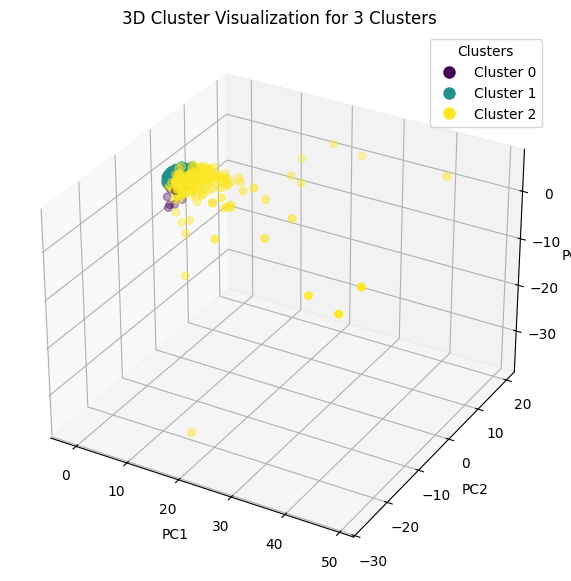


Processing for 4 clusters...
Cluster Sizes and Feature Averages for 4 Clusters:


,Cluster,Size,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,0,1209,151.574028,1.016543,291.996658,20.918114,0.020678,12.618693,0.906534,0.000000,0.000000,291.996658,288.617258,0.459863,0.525753,2.526055
1,1,2661,70.565577,4.886133,1279.688298,65.028185,3.377114,12.481774,0.910560,0.721909,0.132295,1279.688298,361.271870,146.514900,-0.441130,2.579857
2,2,64,160.265625,2.203125,412.983906,3.609375,57.250000,11.937500,0.953125,0.625000,0.450260,412.983906,112.531211,76.965012,-6.098375,2.500000
3,3,428,38.341121,17.320093,10518.593061,159.637850,1.653037,12.242991,0.845794,3.322430,0.200012,10518.593061,1533.114116,988.713078,-253.131603,2.698598



Detailed DataFrame for 4 Clusters:


,CustomerID,Cluster,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,1,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,1,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,1,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,1,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,0,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,0,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,0,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,1,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,1,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


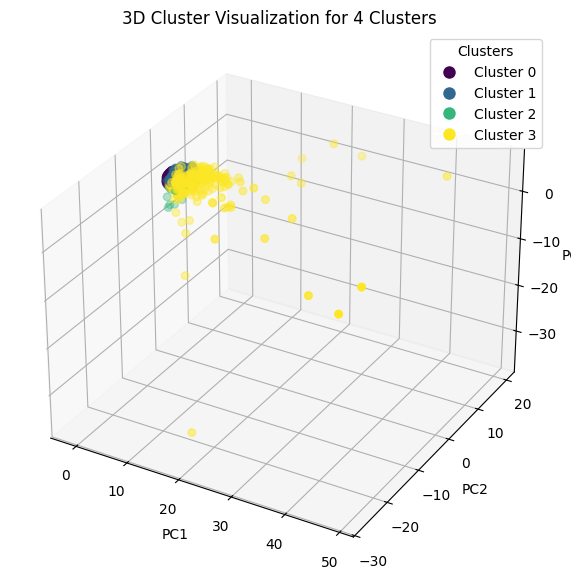


Processing for 5 clusters...
Cluster Sizes and Feature Averages for 5 Clusters:


,Cluster,Size,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,0,1209,151.574028,1.016543,291.996658,20.918114,0.020678,12.618693,0.906534,0.000000,0.000000,291.996658,288.617258,0.459863,0.525753,2.526055
1,1,2661,70.565577,4.886133,1279.688298,65.028185,3.377114,12.481774,0.910560,0.721909,0.132295,1279.688298,361.271870,146.514900,-0.441130,2.579857
2,2,64,160.265625,2.203125,412.983906,3.609375,57.250000,11.937500,0.953125,0.625000,0.450260,412.983906,112.531211,76.965012,-6.098375,2.500000
3,3,425,38.592941,17.014118,8879.498776,158.475294,1.662353,12.258824,0.847059,3.336471,0.201248,8879.498776,1405.362297,879.163055,-262.515325,2.708235
4,4,3,2.666667,60.666667,242723.616667,324.333333,0.333333,10.000000,0.666667,1.333333,0.024974,242723.616667,19631.288526,16508.299747,1076.228941,1.333333



Detailed DataFrame for 5 Clusters:


,CustomerID,Cluster,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,1,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,1,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,1,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,1,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,0,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,0,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,0,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,1,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,1,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


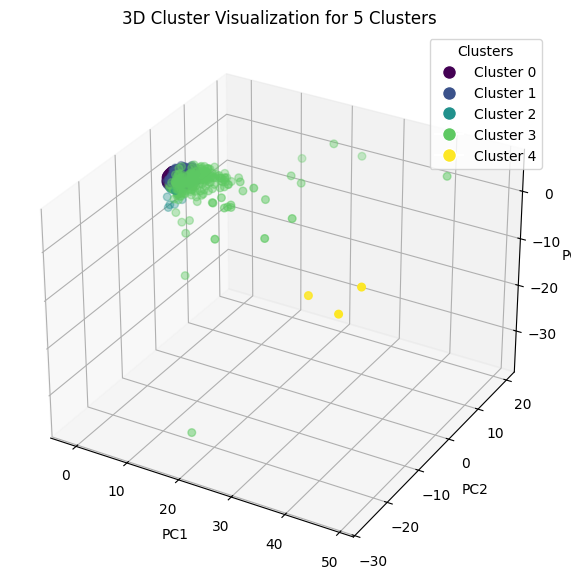

In [53]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming the PCA-transformed data (df_pca) and the original dataset (df) are ready

# Define range for optimal clusters
optimal_clusters_range = range(2, 6)

# Loop through each cluster count and process
for optimal_clusters in optimal_clusters_range:
    print(f"\nProcessing for {optimal_clusters} clusters...")
    
    # Step 1: Fit GMM for the given number of clusters
    gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
    df_pca['Cluster'] = gmm.fit_predict(df_pca)
    
    # Add the cluster labels to the original dataset
    df['Cluster'] = df_pca['Cluster'].values
    
    # Step 2: Calculate cluster sizes and average features
    cluster_sizes = df.groupby('Cluster').size().reset_index(name='Size')
    
    # Exclude 'CustomerID' from feature averaging
    features_to_average = [col for col in df.columns if col not in ['CustomerID', 'Cluster']]
    feature_means = df.groupby('Cluster')[features_to_average].mean().reset_index()
    
    # Merge cluster sizes and feature means
    cluster_sizes = pd.merge(cluster_sizes, feature_means, on='Cluster')
    
    print(f"Cluster Sizes and Feature Averages for {optimal_clusters} Clusters:")
    display(cluster_sizes)
    
    # Step 3: Create and display the detailed DataFrame
    detailed_df = df[['CustomerID', 'Cluster'] + features_to_average]
    print(f"\nDetailed DataFrame for {optimal_clusters} Clusters:")
    display(detailed_df)
    
    # Step 4: Visualize clusters in 3D using the first 3 PCA components
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(
        df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], 
        c=df_pca['Cluster'], cmap='viridis', s=30
    )
    ax.set_title(f'3D Cluster Visualization for {optimal_clusters} Clusters')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    
    # Add a legend
    legend_labels = [f"Cluster {i}" for i in range(optimal_clusters)]
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(i), markersize=10) for i in range(optimal_clusters)]
    ax.legend(handles, legend_labels, title="Clusters", loc='upper right')
    
    plt.show()


TSNE

In [54]:
from sklearn.manifold import TSNE

In [55]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)  # Reduce to 2D
tsne_result = tsne.fit_transform(df_pca)

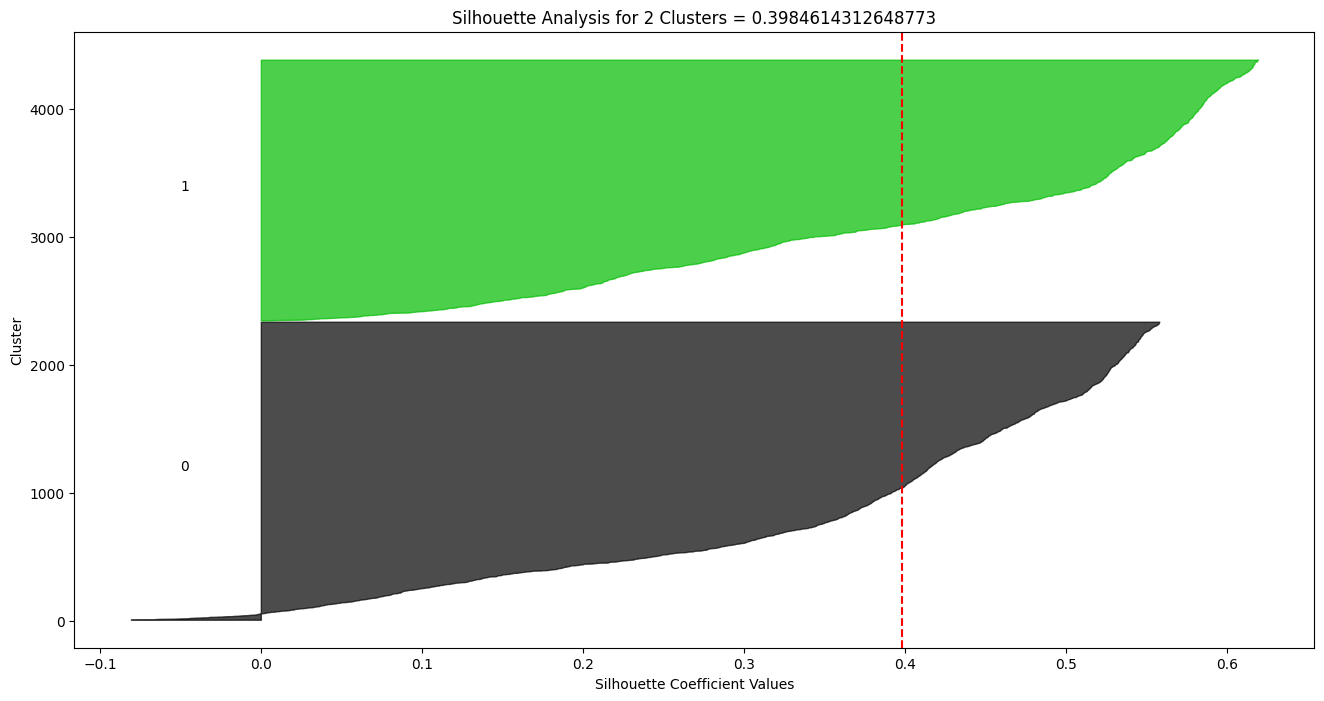

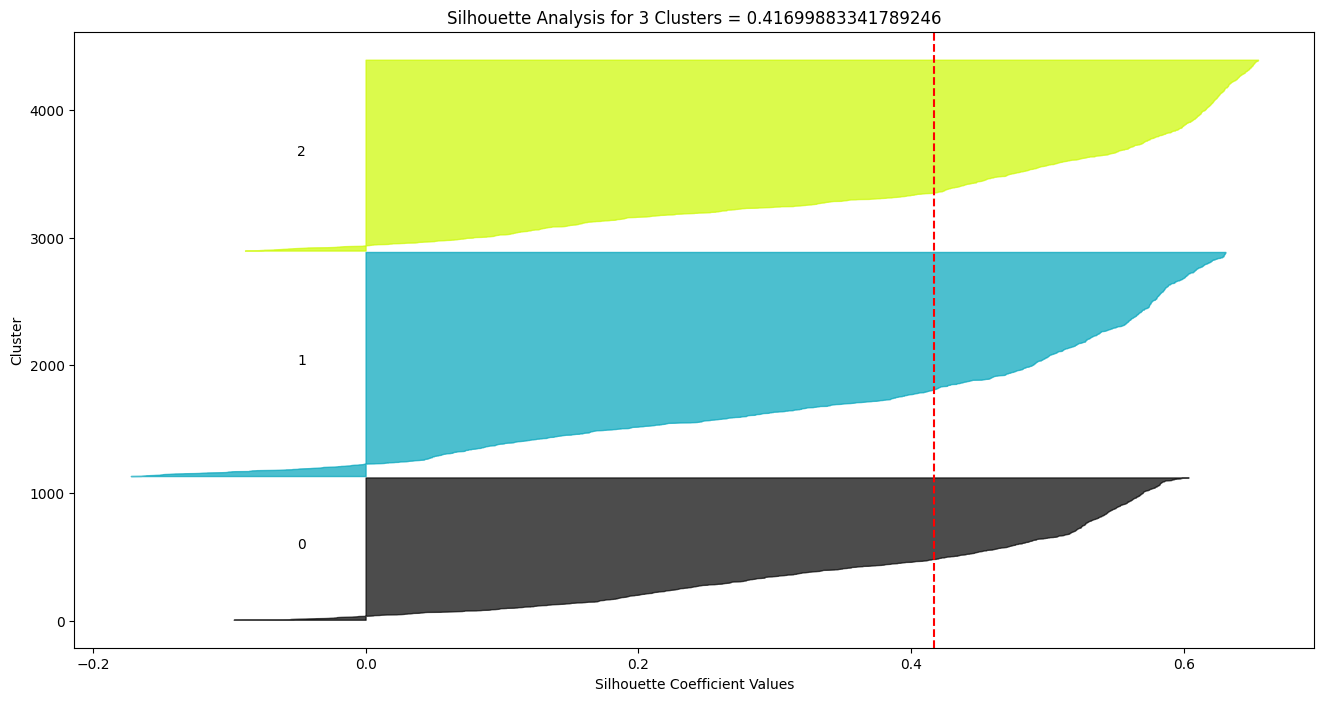

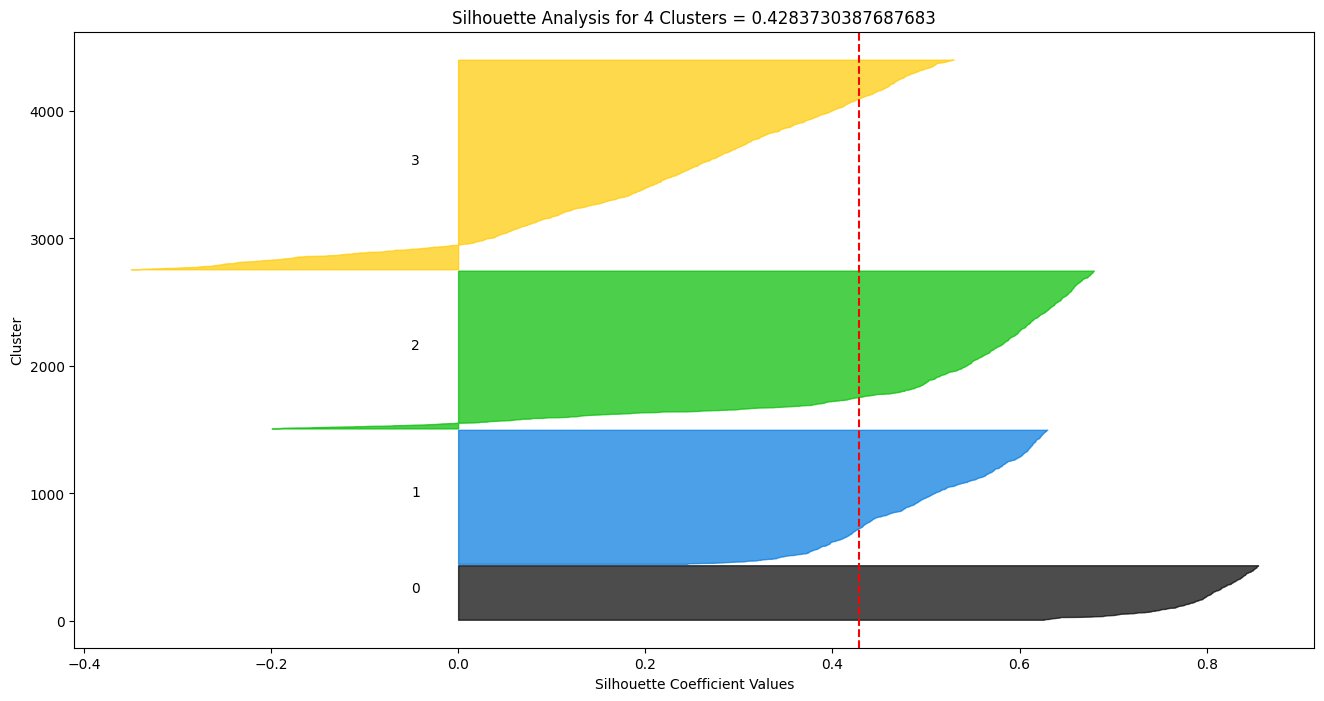

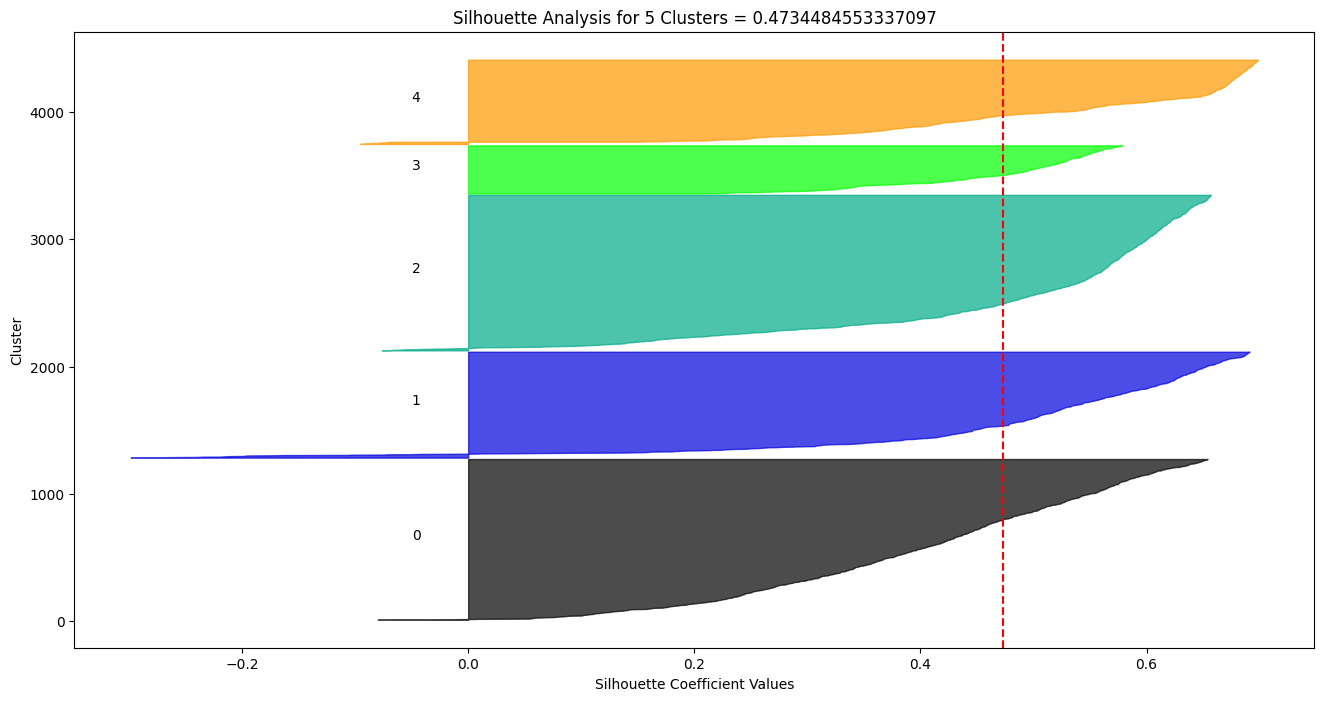

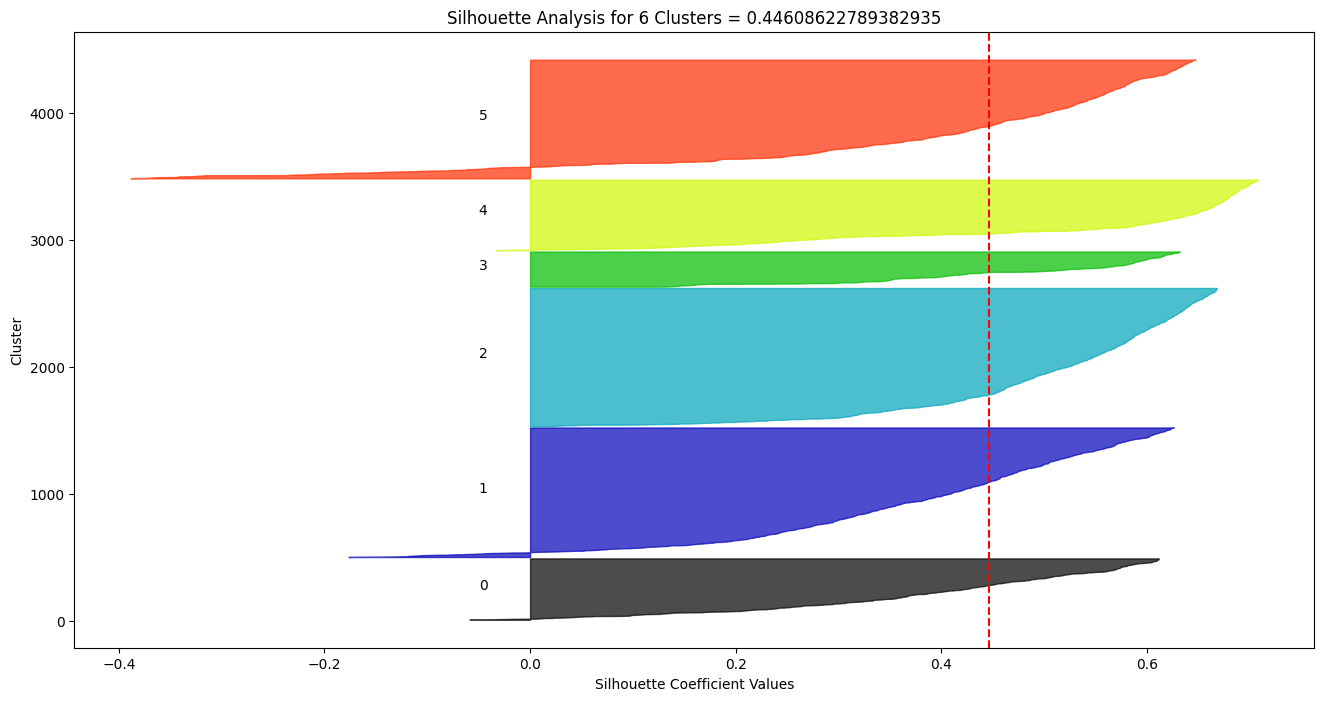

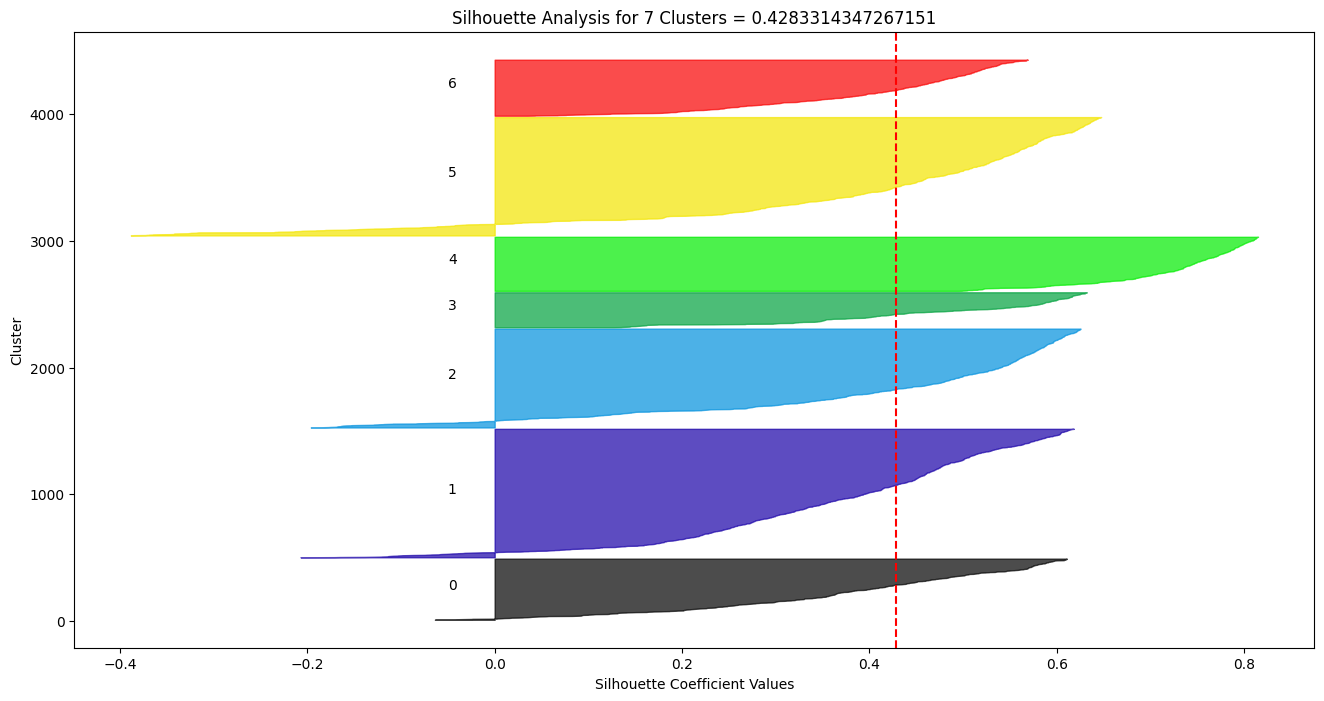

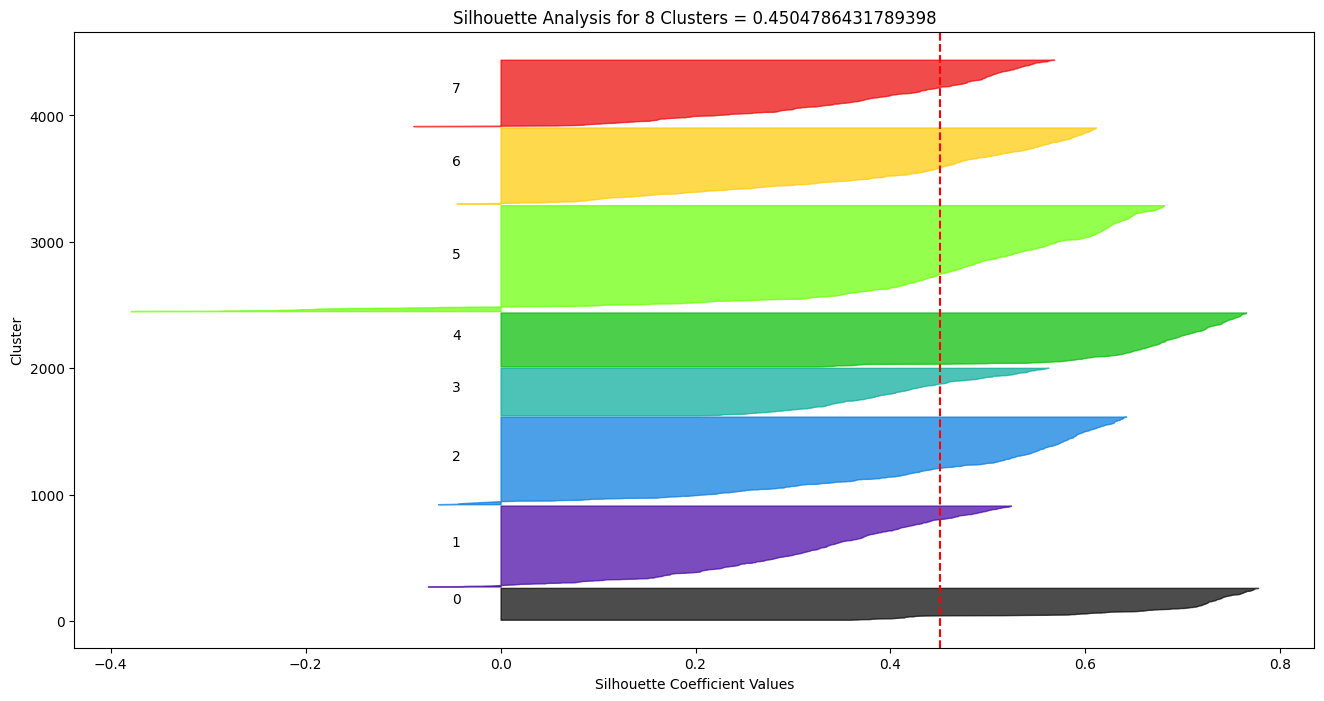

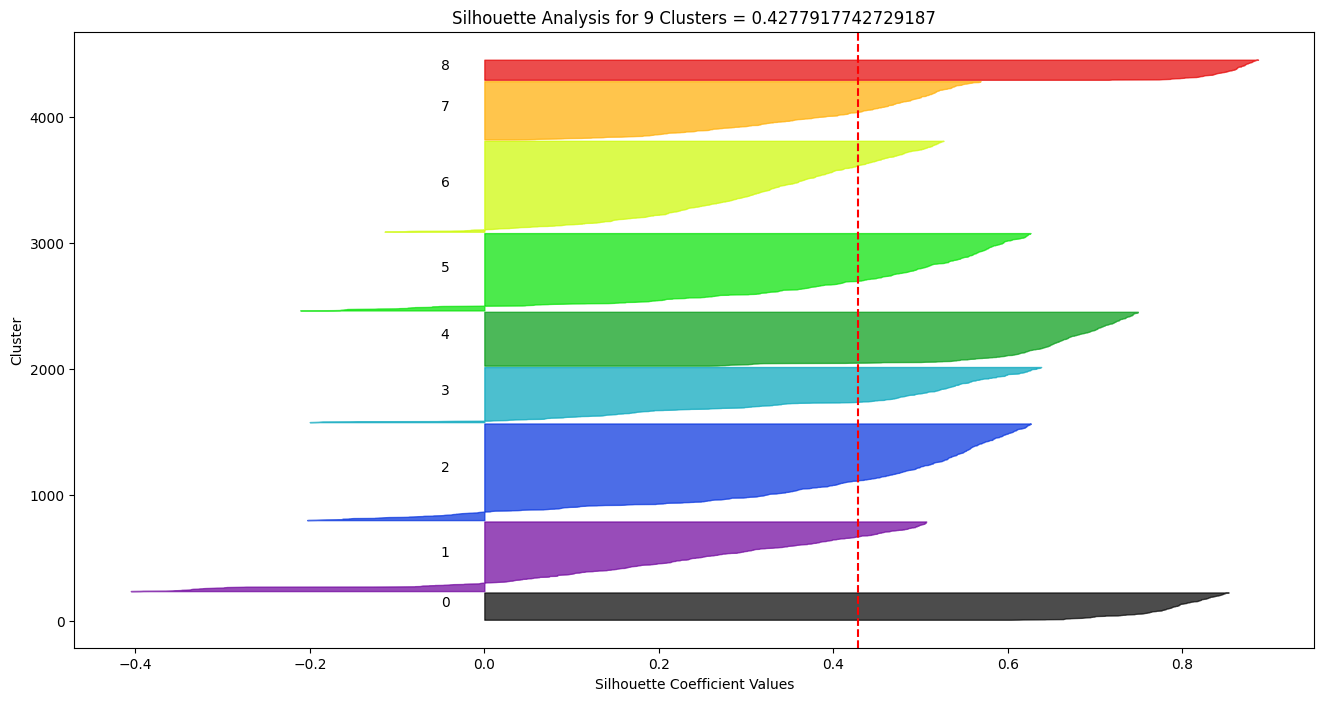

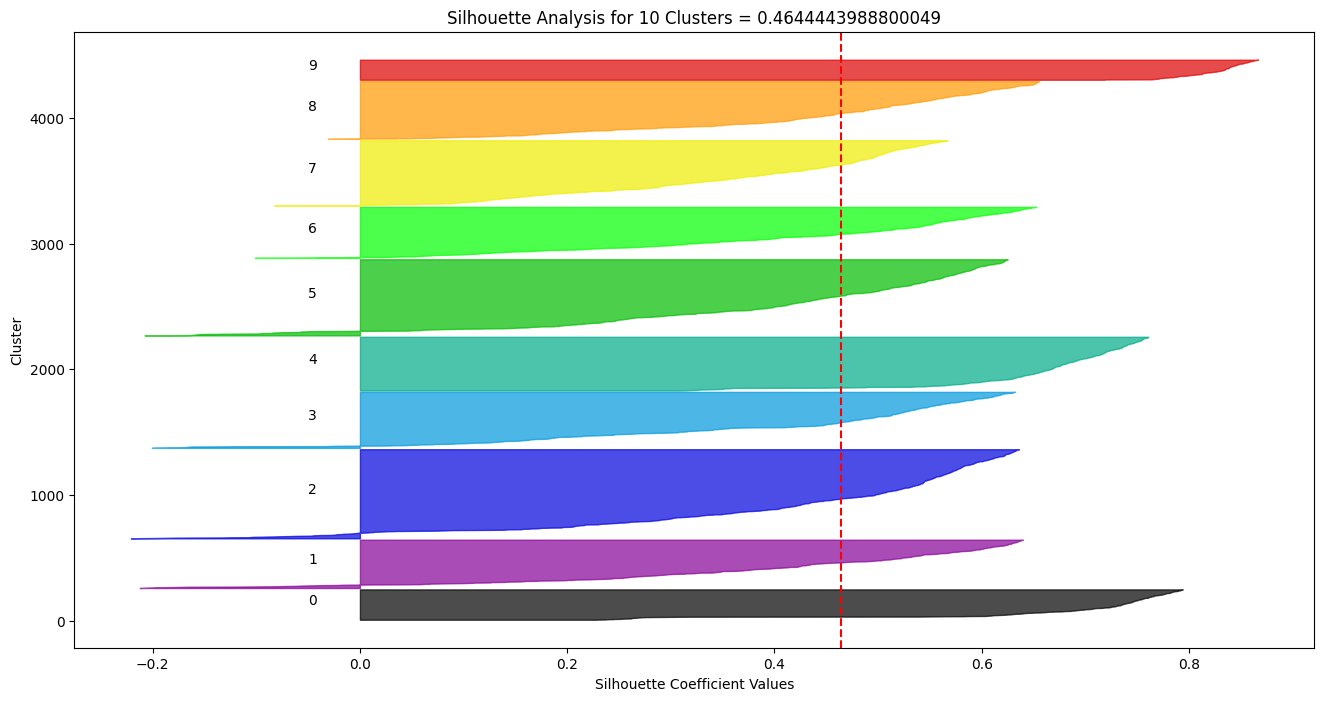


Evaluation Metrics for Clusters:


,Number of Clusters,Silhouette Score,Log-likelihood,CH indices,Bic (find low),Davies Bouldin (find low)
0,2,0.398461,-42698.148242,3703.215768,85488.484028,1.001918
1,3,0.416999,-42341.834474,4108.132274,84826.140608,0.849722
2,4,0.428373,-41486.631925,4105.989939,83166.019627,0.839104
3,5,0.473448,-41436.182285,4976.261979,83115.404462,0.730491
4,6,0.446086,-41065.529917,4719.796700,82424.383843,0.784005
5,7,0.428331,-40945.704083,4764.559914,82235.016290,0.819020
6,8,0.450479,-40790.273883,5238.074115,81974.440006,0.816379
7,9,0.427792,-40475.065492,5187.993749,81394.307339,0.841355
8,10,0.464444,-40431.694135,5827.680439,81357.848741,0.734661


In [56]:
# Range of clusters to evaluate
range_clusters = range(2, 11)

# Initialize lists to store evaluation metrics
aic_TSNE = []
bic_TSNE = []
silhouette_scores_TSNE = []
log_likelihood_values_TSNE = []
CH_index_TSNE = []
DB_values_TSNE = []


silhouette_metrics_TSNE = {
    "Number of Clusters": [],
    "Silhouette Score": [],
    "Log-likelihood":[],
    "CH indices":[],
    "Bic (find low)":[],
    "Davies Bouldin (find low)":[]
}

# Loop through each cluster count
for n_clusters in range_clusters:
    # Fit GMM
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    cluster_gmm = gmm.fit(tsne_result)

    # 1. Calculate log-likelihood
    log_likelihood = cluster_gmm.score(tsne_result) * len(tsne_result)
    log_likelihood_values_TSNE.append(log_likelihood)

    # 2. Calculate AIC/BIC
    aic_TSNE.append(cluster_gmm.aic(tsne_result))
    bic_TSNE.append(cluster_gmm.bic(tsne_result))

    # Assign clusters
    cluster_labels = cluster_gmm.predict(tsne_result)
    #df_pca['Cluster'] = cluster_labels
    
    # 3. Calculate silhouette scores
    overall_silhouette_avg = silhouette_score(tsne_result, cluster_labels)
    silhouette_scores_TSNE.append(overall_silhouette_avg)
    
    # 4. Calculate CH index
    calinski_harabasz = calinski_harabasz_score(tsne_result, cluster_labels)
    CH_index_TSNE.append(calinski_harabasz)

    # 5. Calculate DB 
    davies_bouldin = davies_bouldin_score(tsne_result, cluster_labels)
    DB_values_TSNE.append(davies_bouldin)

    silhouette_metrics_TSNE["Number of Clusters"].append(n_clusters)
    silhouette_metrics_TSNE["Silhouette Score"].append(overall_silhouette_avg)
    silhouette_metrics_TSNE["Log-likelihood"].append(log_likelihood)
    silhouette_metrics_TSNE["CH indices"].append(calinski_harabasz)
    silhouette_metrics_TSNE["Bic (find low)"].append(cluster_gmm.bic(tsne_result))
    silhouette_metrics_TSNE["Davies Bouldin (find low)"].append(davies_bouldin)


    # Visualize silhouette plot
    silhouette_per_sample = silhouette_samples(tsne_result, cluster_labels)

    plt.figure(figsize=(16, 8))
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate silhouette scores for the current cluster
        cluster_values = silhouette_per_sample[np.array(cluster_labels) == i]
        cluster_values.sort()

        size_cluster = cluster_values.shape[0]
        y_upper = y_lower + size_cluster
        color = plt.cm.nipy_spectral(float(i) / n_clusters)

        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=overall_silhouette_avg, color="red", linestyle="--")
    plt.title(f"Silhouette Analysis for {n_clusters} Clusters = {overall_silhouette_avg}")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster")
    plt.show()


metrics_df_TSNE = pd.DataFrame(silhouette_metrics_TSNE)
print("\nEvaluation Metrics for Clusters:")
display(metrics_df_TSNE)

In [64]:
# Plot the trend for aic/bic (find low)

'''plt.figure(figsize=(16,8))
plt.plot(range_clusters, aic_TSNE, marker='o', label="AIC")
plt.plot(range_clusters, bic_TSNE, marker='s', label="BIC")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

# Plot the trend for Log-likelihood

plt.figure(figsize=(16,8))
plt.plot(range_clusters, log_likelihood_values_TSNE, marker='o', label="Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

# Plot the trend for CH Index

plt.figure(figsize=(16, 8))
plt.plot(range_clusters, CH_index_TSNE, marker='o', label="CH Index")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

# Plot the trend for Silhouette Score

plt.figure(figsize=(16, 8))
plt.plot(range_clusters, silhouette_scores_TSNE, marker='o', label="Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

# Plot the trend for DB Values (find low)

plt.figure(figsize=(16, 8))
plt.plot(range_clusters, DB_values_TSNE, marker='o', label="DB Values")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()'''



'plt.figure(figsize=(16,8))\nplt.plot(range_clusters, aic_TSNE, marker=\'o\', label="AIC")\nplt.plot(range_clusters, bic_TSNE, marker=\'s\', label="BIC")\nplt.xlabel("Number of Clusters")\nplt.ylabel("Score")\nplt.legend()\nplt.grid()\nplt.show()\n\n# Plot the trend for Log-likelihood\n\nplt.figure(figsize=(16,8))\nplt.plot(range_clusters, log_likelihood_values_TSNE, marker=\'o\', label="Log-Likelihood")\nplt.xlabel("Number of Clusters")\nplt.ylabel("Score")\nplt.legend()\nplt.grid()\nplt.show()\n\n# Plot the trend for CH Index\n\nplt.figure(figsize=(16, 8))\nplt.plot(range_clusters, CH_index_TSNE, marker=\'o\', label="CH Index")\nplt.xlabel("Number of Clusters")\nplt.ylabel("Score")\nplt.legend()\nplt.grid()\nplt.show()\n\n# Plot the trend for Silhouette Score\n\nplt.figure(figsize=(16, 8))\nplt.plot(range_clusters, silhouette_scores_TSNE, marker=\'o\', label="Silhouette Score")\nplt.xlabel("Number of Clusters")\nplt.ylabel("Score")\nplt.legend()\nplt.grid()\nplt.show()\n\n# Plot the 


Processing for 2 clusters...
Cluster Sizes and Feature Averages for 2 Clusters:


,Cluster,Size,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,0,2327,57.658788,7.773528,3089.539789,90.330898,2.746025,12.705200,0.906317,1.449076,0.198743,3089.539789,570.298306,314.842643,-50.809833,2.903309
1,1,2035,129.495332,1.816216,539.215838,27.855528,3.436364,12.240295,0.900737,0.005405,0.001957,539.215838,317.726484,42.205529,4.405724,2.200491



Detailed DataFrame for 2 Clusters:


,CustomerID,Cluster,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,0,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,0,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,0,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,1,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,1,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,1,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,1,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,0,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,0,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


Exported cluster sizes to 'cluster_sizes_2_clusters.csv'
Exported detailed data to 'detailed_data_2_clusters.csv'


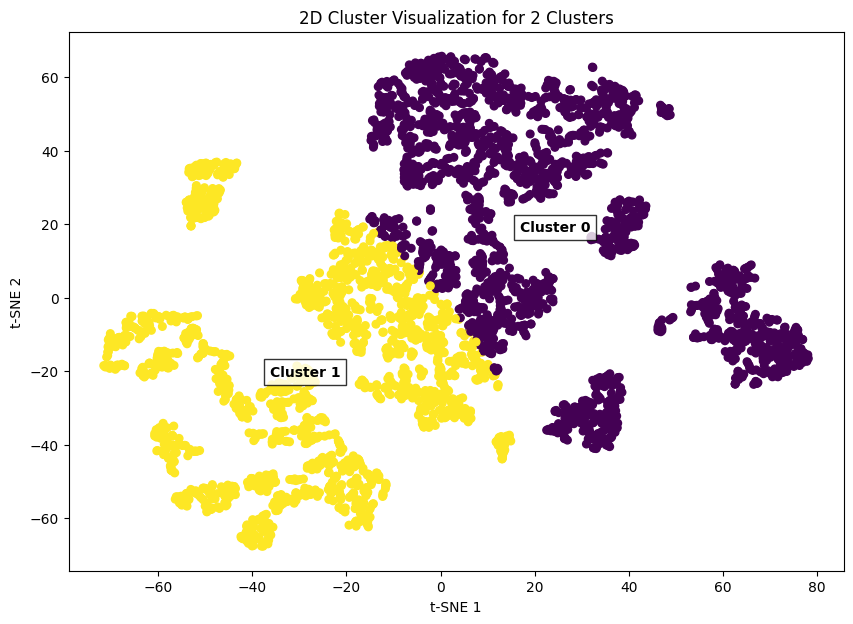


Processing for 3 clusters...
Cluster Sizes and Feature Averages for 3 Clusters:


,Cluster,Size,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,0,1114,45.579892,9.007181,4684.613564,99.135548,4.288600,12.638241,0.894973,1.349192,0.086548,4684.613564,795.028600,457.052180,-91.109964,3.696589
1,1,1754,141.543900,1.614595,472.755627,25.245154,2.704390,12.281072,0.899088,0.003421,0.001378,472.755627,320.132227,32.286242,0.680550,1.994299
2,2,1494,66.031459,5.969880,1498.521044,75.079652,2.585007,12.619813,0.915663,1.254351,0.246069,1498.521044,352.398771,169.170605,-6.001351,2.421687



Detailed DataFrame for 3 Clusters:


,CustomerID,Cluster,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,2,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,2,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,0,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,1,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,1,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,1,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,1,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,2,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,2,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


Exported cluster sizes to 'cluster_sizes_3_clusters.csv'
Exported detailed data to 'detailed_data_3_clusters.csv'


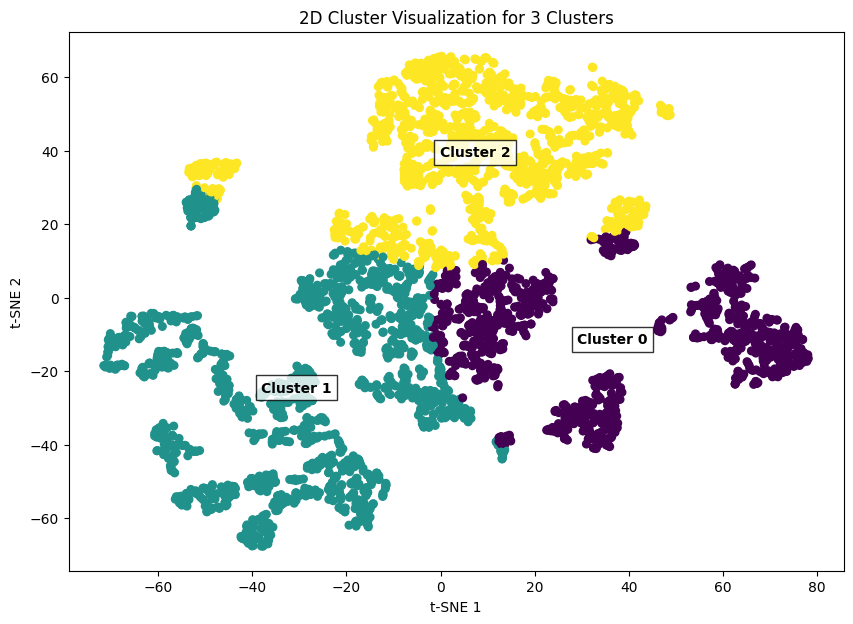


Processing for 4 clusters...
Cluster Sizes and Feature Averages for 4 Clusters:


,Cluster,Size,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,0,428,38.341121,17.320093,10518.593061,159.637850,1.653037,12.242991,0.845794,3.322430,0.200012,10518.593061,1533.114116,988.713078,-253.131603,2.698598
1,1,1052,152.589354,1.019011,297.001435,20.088403,0.023764,12.541825,0.898289,0.000000,0.000000,297.001435,293.117695,0.528492,0.604216,2.007605
2,2,1238,70.386914,6.570275,1564.896478,75.163166,2.910339,12.407108,0.909532,1.575121,0.304418,1564.896478,347.634759,185.043936,-9.487226,2.460420
3,3,1644,81.278589,3.142336,933.648504,51.323601,5.503345,12.579075,0.917883,0.006691,0.002423,933.648504,352.039576,100.801409,6.192849,2.993309



Detailed DataFrame for 4 Clusters:


,CustomerID,Cluster,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,2,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,3,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,3,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,3,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,1,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,1,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,3,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,2,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,2,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


Exported cluster sizes to 'cluster_sizes_4_clusters.csv'
Exported detailed data to 'detailed_data_4_clusters.csv'


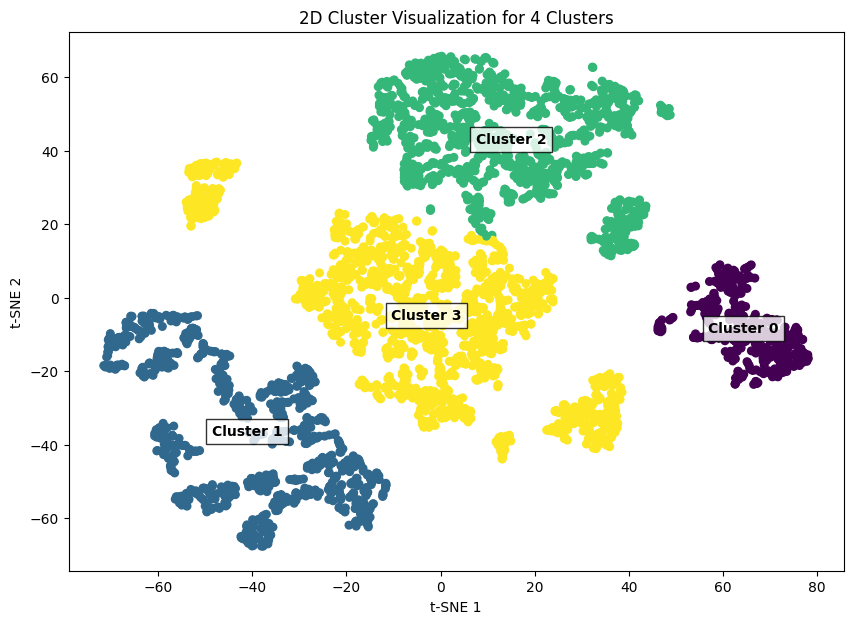


Processing for 5 clusters...
Cluster Sizes and Feature Averages for 5 Clusters:


,Cluster,Size,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,0,1264,76.164557,3.415348,1028.870902,54.165348,4.737342,12.488133,0.904272,0.005538,0.001261,1028.870902,366.198824,113.272464,8.402193,2.085443
1,1,833,180.855942,1.021609,292.553673,19.346939,0.027611,12.600240,0.893157,0.000000,0.000000,292.553673,288.133409,0.624457,0.702287,2.415366
2,2,1223,70.676206,6.552739,1558.069141,73.197874,2.945217,12.391660,0.908422,1.591987,0.307871,1558.069141,346.140091,184.001198,-11.857404,2.460343
3,3,379,88.833773,1.018470,294.471557,24.401055,0.007916,12.651715,0.931398,0.000000,0.000000,294.471557,292.797797,0.568130,0.803456,2.796834
4,4,663,46.251885,12.393665,7127.224751,125.996983,5.681750,12.432881,0.891403,2.155354,0.133241,7127.224751,1110.810574,678.102152,-160.297308,3.796380



Detailed DataFrame for 5 Clusters:


,CustomerID,Cluster,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,2,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,0,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,0,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,0,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,1,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,1,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,3,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,2,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,0,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


Exported cluster sizes to 'cluster_sizes_5_clusters.csv'
Exported detailed data to 'detailed_data_5_clusters.csv'


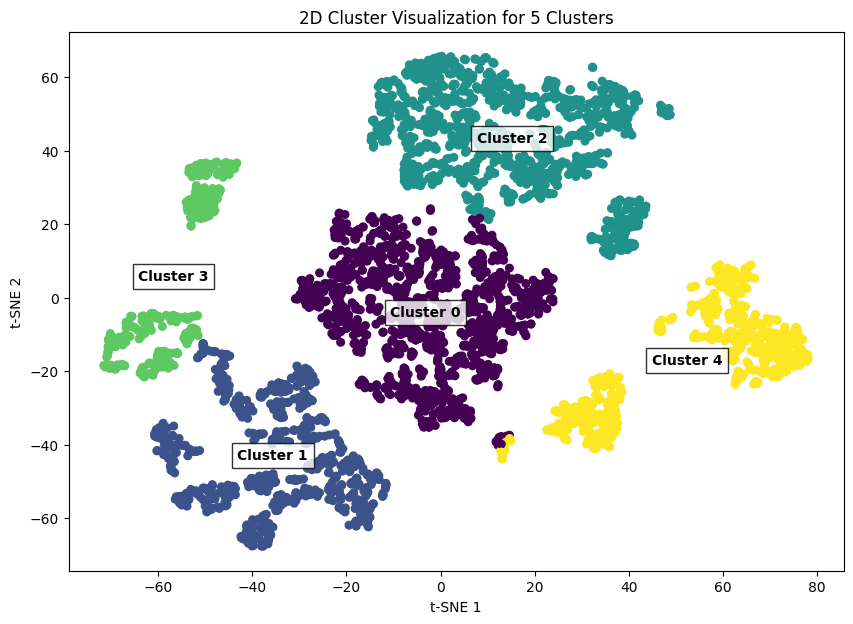


Processing for 6 clusters...
Cluster Sizes and Feature Averages for 6 Clusters:


,Cluster,Size,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,0,484,124.014463,2.807851,754.489525,42.489669,11.369146,12.351240,0.954545,0.022727,0.008230,754.489525,332.268615,87.744098,4.507659,4.241736
1,1,1021,49.481881,3.762977,1152.247904,63.532811,3.473882,12.638590,0.897160,0.004897,0.000473,1152.247904,376.540893,125.693667,10.130952,1.924584
2,2,1089,74.502296,6.515152,1550.069348,69.117539,3.109275,12.317723,0.901745,1.611570,0.313981,1550.069348,343.103989,183.370166,-14.113191,2.041322
3,3,277,102.736462,1.025271,280.856931,26.592058,0.010830,13.328520,0.935018,0.000000,0.000000,280.856931,278.566841,0.777332,1.099314,3.548736
4,4,556,39.023381,14.841727,8456.327032,145.361511,1.657374,12.386691,0.872302,2.899281,0.215949,8456.327032,1265.765379,804.496580,-193.011677,3.455036
5,5,935,166.698396,1.019251,296.796321,19.249198,0.024599,12.405348,0.896257,0.000000,0.000000,296.796321,292.858267,0.556335,0.625674,2.234225



Detailed DataFrame for 6 Clusters:


,CustomerID,Cluster,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,2,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,1,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,1,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,1,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,5,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,5,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,3,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,2,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,1,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


Exported cluster sizes to 'cluster_sizes_6_clusters.csv'
Exported detailed data to 'detailed_data_6_clusters.csv'


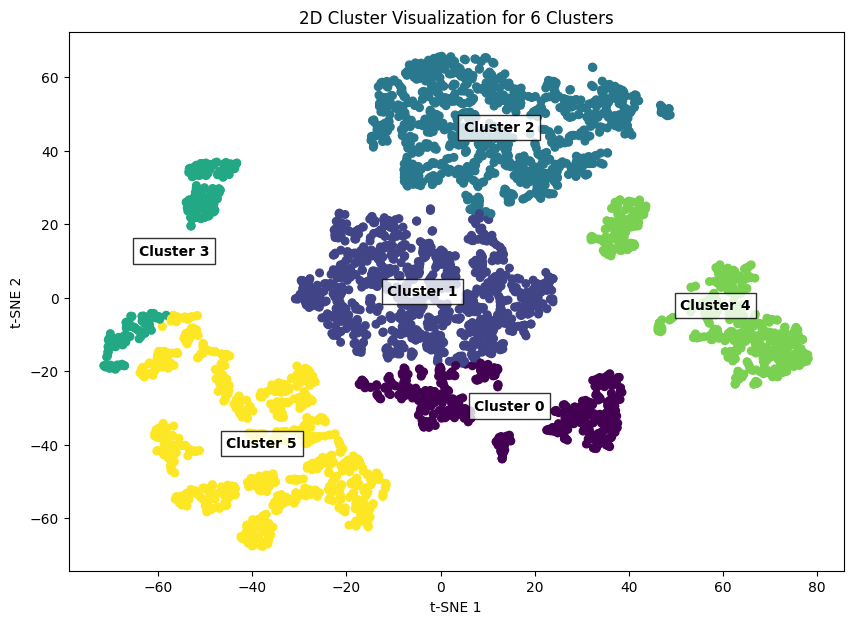


Processing for 7 clusters...
Cluster Sizes and Feature Averages for 7 Clusters:


,Cluster,Size,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,0,483,124.227743,2.809524,755.456190,42.525880,11.363699,12.356108,0.954451,0.022774,0.008247,755.456190,332.658830,87.841598,4.636019,4.242236
1,1,1015,49.775369,3.692611,1139.813527,61.944828,3.506240,12.616749,0.896552,0.002956,0.000339,1139.813527,376.637217,125.115748,10.267929,1.917241
2,2,781,31.382843,7.941101,1996.612074,88.394366,3.192061,12.236876,0.903969,1.743918,0.252888,1996.612074,389.450267,215.330767,-2.848365,1.792574
3,3,277,102.736462,1.025271,280.856931,26.592058,0.010830,13.328520,0.935018,0.000000,0.000000,280.856931,278.566841,0.777332,1.099314,3.548736
4,4,428,38.341121,17.320093,10518.593061,159.637850,1.653037,12.242991,0.845794,3.322430,0.200012,10518.593061,1533.114116,988.713078,-253.131603,2.698598
5,5,935,166.698396,1.019251,296.796321,19.249198,0.024599,12.405348,0.896257,0.000000,0.000000,296.796321,292.858267,0.556335,0.625674,2.234225
6,6,443,139.796840,4.126411,786.125192,46.832957,2.503386,12.668172,0.916479,1.320542,0.404110,786.125192,269.475318,128.733825,-27.662740,3.638826



Detailed DataFrame for 7 Clusters:


,CustomerID,Cluster,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,6,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,1,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,1,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,1,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,5,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,5,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,3,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,6,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,2,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


Exported cluster sizes to 'cluster_sizes_7_clusters.csv'
Exported detailed data to 'detailed_data_7_clusters.csv'


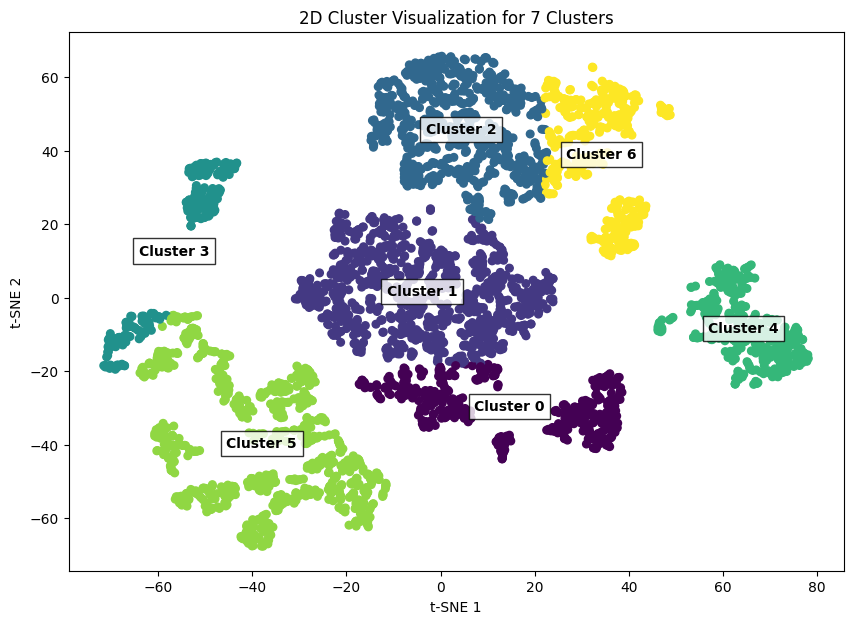


Processing for 8 clusters...
Cluster Sizes and Feature Averages for 8 Clusters:


,Cluster,Size,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,0,253,61.549407,3.403162,937.909447,60.371542,16.049407,12.569170,0.976285,0.043478,0.015744,937.909447,335.283790,112.250461,12.280406,5.533597
1,1,641,94.833073,3.046802,874.062590,41.444618,5.297452,12.333853,0.900156,0.000000,0.000000,874.062590,341.109585,106.220099,12.450327,3.084243
2,2,694,31.798271,8.242075,2078.851513,92.219020,2.556196,12.092219,0.903458,1.835735,0.256970,2078.851513,397.428115,219.907667,-0.821324,1.644092
3,3,376,88.795213,1.018617,294.759441,24.531915,0.007979,12.672872,0.930851,0.000000,0.000000,294.759441,293.072327,0.572662,0.809867,2.811170
4,4,428,38.341121,17.320093,10518.593061,159.637850,1.653037,12.242991,0.845794,3.322430,0.200012,10518.593061,1533.114116,988.713078,-253.131603,2.698598
5,5,839,180.849821,1.026222,293.880644,19.321812,0.039333,12.580453,0.893921,0.000000,0.000000,293.880644,288.244386,1.475852,1.907634,2.401669
6,6,605,55.171901,3.851240,1207.902545,70.304132,2.615427,12.761983,0.905785,0.006612,0.000706,1207.902545,396.120989,120.501441,0.631933,1.042975
7,7,526,122.353612,4.304183,867.378099,47.057034,3.473384,12.766160,0.914449,1.277567,0.376627,867.378099,278.528748,136.689315,-26.109212,3.532319



Detailed DataFrame for 8 Clusters:


,CustomerID,Cluster,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,7,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,6,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,1,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,6,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,5,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,5,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,3,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,7,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,6,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


Exported cluster sizes to 'cluster_sizes_8_clusters.csv'
Exported detailed data to 'detailed_data_8_clusters.csv'


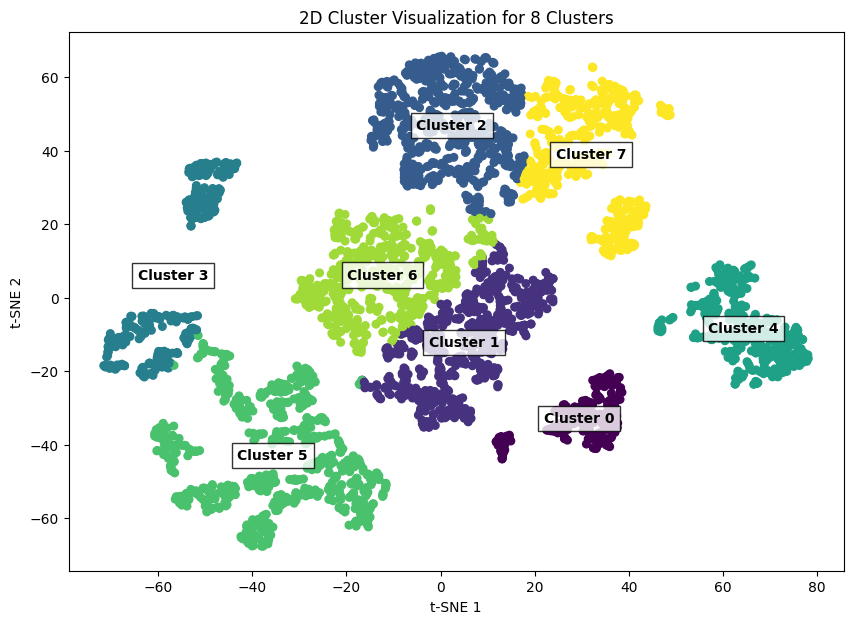


Processing for 9 clusters...
Cluster Sizes and Feature Averages for 9 Clusters:


,Cluster,Size,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,0,217,61.718894,3.488479,968.785576,69.889401,2.970046,12.903226,0.972350,0.000000,0.000000,968.785576,347.727756,114.625753,11.375040,6.000000
1,1,553,127.421338,2.613020,738.048698,26.867993,11.478602,11.216998,0.896926,0.019892,0.007203,738.048698,349.340259,84.437113,-0.129961,2.025316
2,2,767,31.542373,8.036506,2021.642803,90.730117,3.024772,12.199478,0.903520,1.752282,0.252013,2021.642803,391.441675,217.229944,-2.306927,1.762712
3,3,438,137.993151,1.006849,300.501941,20.657534,0.006849,11.986301,0.894977,0.000000,0.000000,300.501941,299.180457,0.120305,0.170137,0.611872
4,4,428,38.341121,17.320093,10518.593061,159.637850,1.653037,12.242991,0.845794,3.322430,0.200012,10518.593061,1533.114116,988.713078,-253.131603,2.698598
5,5,614,163.001629,1.027687,294.504332,19.682410,0.035831,12.938111,0.900651,0.000000,0.000000,294.504332,288.792793,0.819675,0.913868,3.003257
6,6,722,36.185596,3.932133,1228.450970,72.274238,2.845337,13.423823,0.911357,0.000000,0.000000,1228.450970,375.622723,133.121154,13.001405,2.163435
7,7,463,135.611231,4.168467,806.683650,46.222462,2.771058,12.723542,0.917927,1.308855,0.396493,806.683650,273.049152,130.293817,-25.555377,3.609071
8,8,160,148.731250,1.031250,267.852625,26.443750,0.006250,13.106250,0.950000,0.000000,0.000000,267.852625,266.410500,1.122002,1.586750,6.000000



Detailed DataFrame for 9 Clusters:


,CustomerID,Cluster,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,7,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,6,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,6,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,1,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,5,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,3,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,8,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,7,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,2,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


Exported cluster sizes to 'cluster_sizes_9_clusters.csv'
Exported detailed data to 'detailed_data_9_clusters.csv'


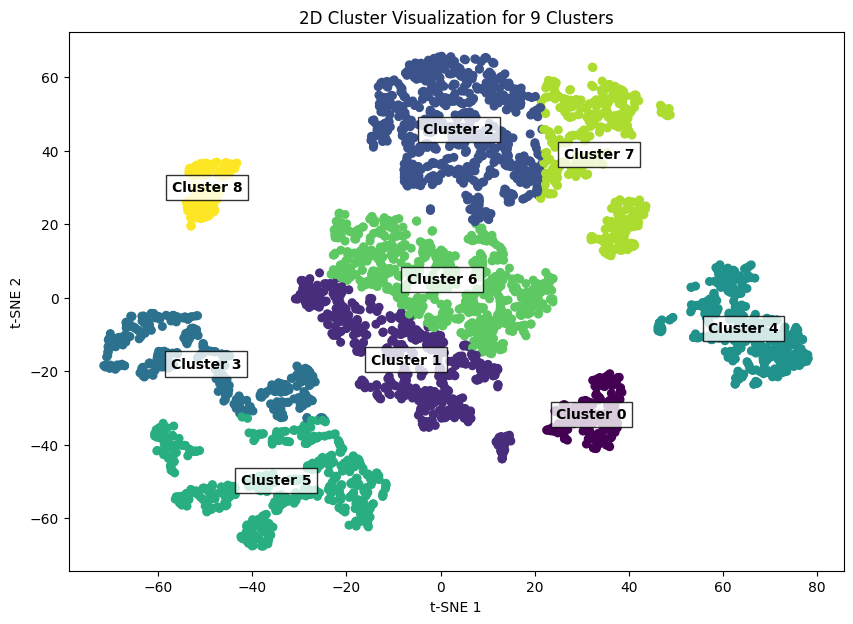


Processing for 10 clusters...
Cluster Sizes and Feature Averages for 10 Clusters:


,Cluster,Size,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,0,242,59.747934,3.404959,948.191736,62.987603,14.229339,12.719008,0.975207,0.033058,0.012672,948.191736,339.998763,111.658800,10.623644,5.723140
1,1,385,143.420779,2.625974,725.413662,25.285714,7.845887,11.314286,0.898701,0.007792,0.002381,725.413662,339.831416,91.165185,9.952026,2.589610
2,2,709,32.157969,8.265162,2090.518307,93.679831,2.526093,12.121298,0.901269,1.811001,0.253538,2090.518307,399.547832,220.717879,-0.208162,1.667137
3,3,446,140.748879,1.006726,300.238341,20.663677,0.006726,11.970852,0.896861,0.000000,0.000000,300.238341,298.940561,0.118147,0.167085,0.632287
4,4,428,38.341121,17.320093,10518.593061,159.637850,1.653037,12.242991,0.845794,3.322430,0.200012,10518.593061,1533.114116,988.713078,-253.131603,2.698598
5,5,606,161.303630,1.028053,294.619158,19.665017,0.036304,12.962046,0.899340,0.000000,0.000000,294.619158,288.832219,0.830495,0.925932,3.019802
6,6,406,41.206897,3.785714,1148.357365,70.884236,3.120690,13.689655,0.906404,0.000000,0.000000,1148.357365,371.472211,134.956854,25.449709,3.130542
7,7,520,123.425000,4.280769,845.984654,46.644231,3.484615,12.771154,0.919231,1.280769,0.379061,845.984654,275.084486,134.964268,-25.942467,3.536538
8,8,460,51.254348,3.645652,1157.248500,62.534783,2.859420,12.426087,0.904348,0.000000,0.000000,1157.248500,383.137730,110.955401,-10.685623,0.723913
9,9,160,148.731250,1.031250,267.852625,26.443750,0.006250,13.106250,0.950000,0.000000,0.000000,267.852625,266.410500,1.122002,1.586750,6.000000



Detailed DataFrame for 10 Clusters:


,CustomerID,Cluster,Recency,Frequency,Monetary,UniqueItemsPurchased,AvgDaysBetweenPurchases,FavoriteShoppingHour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Total_Spend,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,FavoriteShoppingDay
0,12346,7,325,2,0.00,1,0.0,10,1,1.0,0.500000,0.00,0.000000,0.000000,0.000000,1
1,12347,8,1,7,4310.00,103,2.0,14,0,0.0,0.000000,4310.00,615.714286,341.070789,4.486071,1
2,12348,6,74,4,1437.24,21,10.0,19,0,0.0,0.000000,1437.24,359.310000,203.875689,-100.884000,3
3,12349,8,18,1,1457.55,72,0.0,9,0,0.0,0.000000,1457.55,1457.550000,0.000000,0.000000,0
4,12350,5,309,1,294.40,16,0.0,16,0,0.0,0.000000,294.40,294.400000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4357,18280,3,277,1,180.60,10,0.0,9,1,0.0,0.000000,180.60,180.600000,0.000000,0.000000,0
4358,18281,9,180,1,80.82,7,0.0,10,1,0.0,0.000000,80.82,80.820000,0.000000,0.000000,6
4359,18282,7,7,3,176.60,12,9.0,13,1,1.0,0.333333,176.60,88.300000,14.792674,-20.920000,4
4360,18283,2,3,16,2088.93,262,0.0,14,1,0.0,0.000000,2088.93,208.893000,168.947794,22.437394,3


Exported cluster sizes to 'cluster_sizes_10_clusters.csv'
Exported detailed data to 'detailed_data_10_clusters.csv'


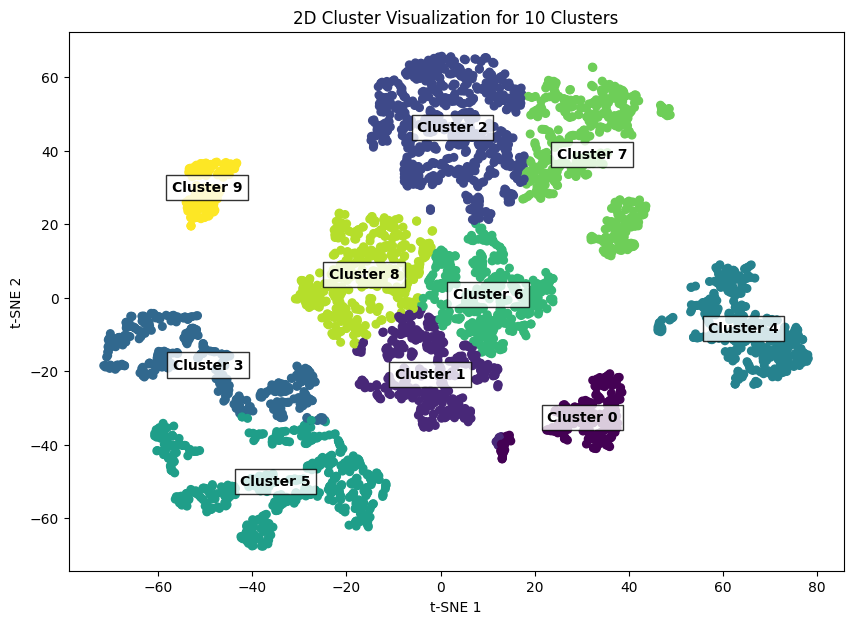

In [58]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming tsne_result is a NumPy array or DataFrame with t-SNE results
# and df is the original dataset

# Define range for optimal clusters
optimal_clusters_range = range(2, 11)

for optimal_clusters in optimal_clusters_range:
    print(f"\nProcessing for {optimal_clusters} clusters...")
    
    # Step 1: Fit GMM for the given number of clusters
    gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
    cluster_labels = gmm.fit_predict(tsne_result)
    
    # Add cluster labels to a copy of the original dataset
    df['Cluster'] = cluster_labels
    
    # Step 2: Calculate cluster sizes and average features
    cluster_sizes = df.groupby('Cluster').size().reset_index(name='Size')
    
    # Exclude 'CustomerID' from feature averaging if it exists
    features_to_average = [col for col in df.columns if col not in ['CustomerID', 'Cluster']]
    feature_means = df.groupby('Cluster')[features_to_average].mean().reset_index()
    
    # Merge cluster sizes and feature means
    cluster_sizes = pd.merge(cluster_sizes, feature_means, on='Cluster')
    
    print(f"Cluster Sizes and Feature Averages for {optimal_clusters} Clusters:")
    display(cluster_sizes)
    
    # Step 3: Create and display the detailed DataFrame
    detailed_df = df[['CustomerID', 'Cluster'] + features_to_average] if 'CustomerID' in df.columns else df[['Cluster'] + features_to_average]
    print(f"\nDetailed DataFrame for {optimal_clusters} Clusters:")
    display(detailed_df)


    # Export cluster sizes and detailed DataFrame to CSV
    cluster_sizes.to_csv(f'cluster_sizes_{optimal_clusters}_clusters.csv', index=False)
    detailed_df.to_csv(f'detailed_data_{optimal_clusters}_clusters.csv', index=False)
    print(f"Exported cluster sizes to 'cluster_sizes_{optimal_clusters}_clusters.csv'")
    print(f"Exported detailed data to 'detailed_data_{optimal_clusters}_clusters.csv'")
    
    
    # Step 4: Visualize clusters
    fig = plt.figure(figsize=(10, 7))
    if tsne_result.shape[1] == 2:  # 2D t-SNE result
        plt.scatter(
            tsne_result[:, 0], tsne_result[:, 1],
            c=cluster_labels, cmap='viridis', s=30
        )
        plt.title(f'2D Cluster Visualization for {optimal_clusters} Clusters')
        plt.xlabel('t-SNE 1')
        plt.ylabel('t-SNE 2')

            # Annotate cluster centers with labels
        for cluster in np.unique(cluster_labels):
            cluster_points = tsne_result[cluster_labels == cluster]
            cluster_center = cluster_points.mean(axis=0)
            plt.text(cluster_center[0], cluster_center[1], f"Cluster {cluster}",
                    fontsize=10, fontweight='bold', ha='center', va='center', 
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

    elif tsne_result.shape[1] == 3:  # 3D t-SNE result
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(
            tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2],
            c=cluster_labels, cmap='viridis', s=30
        )
        ax.set_title(f'3D Cluster Visualization for {optimal_clusters} Clusters')
        ax.set_xlabel('t-SNE 1')
        ax.set_ylabel('t-SNE 2')
        ax.set_zlabel('t-SNE 3')
        # Add a legend
        legend_labels = [f"Cluster {i}" for i in range(optimal_clusters)]
        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(i), markersize=10) for i in range(optimal_clusters)]
        ax.legend(handles, legend_labels, title="Clusters", loc='upper right')
    else:
        raise ValueError(f"t-SNE result must have 2 or 3 dimensions, but got {tsne_result.shape[1]}")
    
    plt.show()
